In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Loan_amount_prediction_dataset.csv")

# Overview of Dataset

In [4]:
df.shape

(30000, 24)

In [5]:
df.sample(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
14032,C-6150,Brian Goold,F,65,942.33,High,Pensioner,NaN,Semi-Urban,41116.95,...,877.48,0,Active,538,942.33,3,Rural,0,53962.22,32893.56
9383,C-7488,Laree Faunce,F,57,1613.95,Low,Working,Sales staff,Semi-Urban,94680.72,...,NaN,0,Inactive,388,1613.95,3,Rural,1,131387.97,71010.54
1841,C-14957,Nova Decola,M,35,3067.06,Low,Commercial associate,Sales staff,Semi-Urban,52443.27,...,628.67,0,Inactive,167,3067.06,3,Rural,0,97479.67,0.00
16904,C-12152,Herbert Fiorentino,M,64,2369.03,Low,Working,Laborers,Semi-Urban,29459.78,...,669.05,0,Inactive,779,2369.03,3,Urban,1,47615.85,19148.86
28501,C-43407,Nathalie Ver,F,27,5245.43,Low,Working,Managers,Semi-Urban,176626.30,...,688.51,0,Active,389,5245.43,2,Urban,1,286822.59,0.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [7]:
df.isnull().sum().sort_values(ascending=False)

Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Customer ID                       0
No. of Defaults                   0
Name                              0
Expense Type 1                    0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 2                    0
dtype: int64

In [8]:
total_cells = (df.shape[0] * df.shape[1])
missing_cells = df.isna().sum().sum()

missing_perc = np.round((missing_cells/ total_cells)*100, 2)

print(f'Total missing percent in data is {missing_perc} %')


Total missing percent in data is 3.48 %


In [9]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [10]:
df.nunique()

Customer ID                    30000
Name                           30000
Gender                             2
Age                               48
Income (USD)                   24429
Income Stability                   2
Profession                         8
Type of Employment                18
Location                           3
Loan Amount Request (USD)      29982
Current Loan Expenses (USD)    24041
Expense Type 1                     2
Expense Type 2                     2
Dependents                        10
Credit Score                   17586
No. of Defaults                    2
Has Active Credit Card             3
Property ID                      999
Property Age                   24179
Property Type                      4
Property Location                  3
Co-Applicant                       3
Property Price                 29632
Loan Sanction Amount (USD)     21450
dtype: int64

In [11]:
df.duplicated().sum()
 

0

In [12]:
df.corr(numeric_only=True)

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.010201,-0.010450,-0.023684,-0.083454,0.129760,0.003573,-0.012358,-0.010341,0.002196,0.000632,-0.009819,0.008112
Income (USD),-0.010201,1.000000,0.050371,0.055080,0.005170,0.012911,-0.002141,-0.008139,1.000000,0.009733,0.000469,0.050679,0.038157
Loan Amount Request (USD),-0.010450,0.050371,1.000000,0.682248,0.040952,0.178260,0.000088,-0.008426,0.049976,0.003802,0.001864,0.948350,0.726408
Current Loan Expenses (USD),-0.023684,0.055080,0.682248,1.000000,0.045300,0.114950,0.002767,-0.014519,0.054682,0.014812,0.002130,0.648636,0.485070
Dependents,-0.083454,0.005170,0.040952,0.045300,1.000000,-0.090271,0.009108,0.002471,0.005082,-0.009303,0.002796,0.037302,0.009088
Credit Score,0.129760,0.012911,0.178260,0.114950,-0.090271,1.000000,0.006647,-0.006062,0.012959,0.009116,0.009611,0.170829,0.369450
No. of Defaults,0.003573,-0.002141,0.000088,0.002767,0.009108,0.006647,1.000000,-0.001282,-0.002093,0.000477,-0.008191,0.001718,-0.004330
Property ID,-0.012358,-0.008139,-0.008426,-0.014519,0.002471,-0.006062,-0.001282,1.000000,-0.008075,0.008658,0.008151,-0.011890,-0.009751
Property Age,-0.010341,1.000000,0.049976,0.054682,0.005082,0.012959,-0.002093,-0.008075,1.000000,0.009798,0.000472,0.050306,0.037796
Property Type,0.002196,0.009733,0.003802,0.014812,-0.009303,0.009116,0.000477,0.008658,0.009798,1.000000,-0.001105,0.003279,0.001984


# Pre-Processing

In [14]:
# Dropping Unnecessary Features
df.drop(columns=['Customer ID', 'Name','Expense Type 1','Expense Type 2','Property ID','Property Age','Property Type'],inplace=True)

In [15]:
df.sample(5)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
20529,F,35,2327.80,Low,State servant,High skill tech staff,Semi-Urban,40624.02,204.34,3.0,662.28,1,Inactive,Semi-Urban,1,51634.40,28436.81
15230,F,28,1650.93,Low,Commercial associate,Laborers,Semi-Urban,28737.06,201.06,1.0,632.87,0,Inactive,Semi-Urban,1,54308.48,0.00
5736,M,56,2745.52,Low,Working,Laborers,Semi-Urban,26577.72,133.26,NaN,NaN,0,Unpossessed,Rural,0,45437.95,0.00
1645,F,52,5551.44,Low,Working,Drivers,Urban,75650.25,517.27,3.0,797.51,0,Inactive,Rural,1,84677.60,60520.20
23645,M,35,NaN,Low,Working,Laborers,Semi-Urban,162630.18,519.49,3.0,711.93,0,Active,Urban,1,-999.00,113841.13


In [16]:
df['Loan Sanction Amount (USD)'].isnull().sum()

340

In [17]:
# Dropping missing values of target feature
df.dropna(subset=['Loan Sanction Amount (USD)'],inplace=True)

In [18]:
df['Loan Sanction Amount (USD)'].isnull().sum()

0

In [19]:
# Checking for mis-spelled words
columns = df.select_dtypes('object').columns

for col in columns:
    if col == 'Customer ID':
        continue   # Excluding Customer ID feature
    print(df[col].unique())
    

['F' 'M' nan]
['Low' 'High' nan]
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']
['Semi-Urban' 'Rural' 'Urban']
[nan 'Unpossessed' 'Active' 'Inactive']
['Rural' 'Urban' 'Semi-Urban' nan]


<p style="color:yellow">There are not any mis-spelled word</p>

In [21]:
# Mis-typed numbers
columns= df.select_dtypes(exclude='object').columns

for col in columns:
    min = df[col].min()
    max = df[col].max()
    print(f' {col} : [{min} to {max}]')

 Age : [18 to 65]
 Income (USD) : [377.7 to 1777460.21]
 Loan Amount Request (USD) : [6048.24 to 621497.82]
 Current Loan Expenses (USD) : [-999.0 to 3840.88]
 Dependents : [1.0 to 14.0]
 Credit Score : [580.0 to 896.26]
 No. of Defaults : [0 to 1]
 Co-Applicant : [-999 to 1]
 Property Price : [-999.0 to 1077966.73]
 Loan Sanction Amount (USD) : [-999.0 to 481907.32]


<p style="color:yellow">Some features have unnatural numbers</p>

In [23]:
var = ['Current Loan Expenses (USD)', 'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)']
(df[var]== -999).sum()

Current Loan Expenses (USD)    174
Co-Applicant                   165
Property Price                 341
Loan Sanction Amount (USD)     338
dtype: int64

In [24]:
# The values containing -999 is not so much. So, we will drop it.
index_to_keep = (df[var] != -999).all(axis=1)
df= df.loc[index_to_keep]
df.shape

(28674, 17)

In [25]:
df.sample(3)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
2469,F,57,3461.92,Low,Commercial associate,Sales staff,Semi-Urban,45862.65,211.70,2.0,858.09,1,Inactive,Semi-Urban,0,83911.12,34396.99
25468,M,57,7673.06,Low,Working,Managers,Semi-Urban,78290.66,247.59,2.0,760.34,0,Inactive,Urban,1,108579.43,58718.00
13870,M,65,2527.12,High,Pensioner,NaN,Semi-Urban,155142.47,612.03,1.0,719.15,0,Unpossessed,Rural,0,261339.51,0.00


# Exploratory Data Analysis(EDA)

## Univariate Analysis

<Axes: xlabel='Property Location', ylabel='count'>

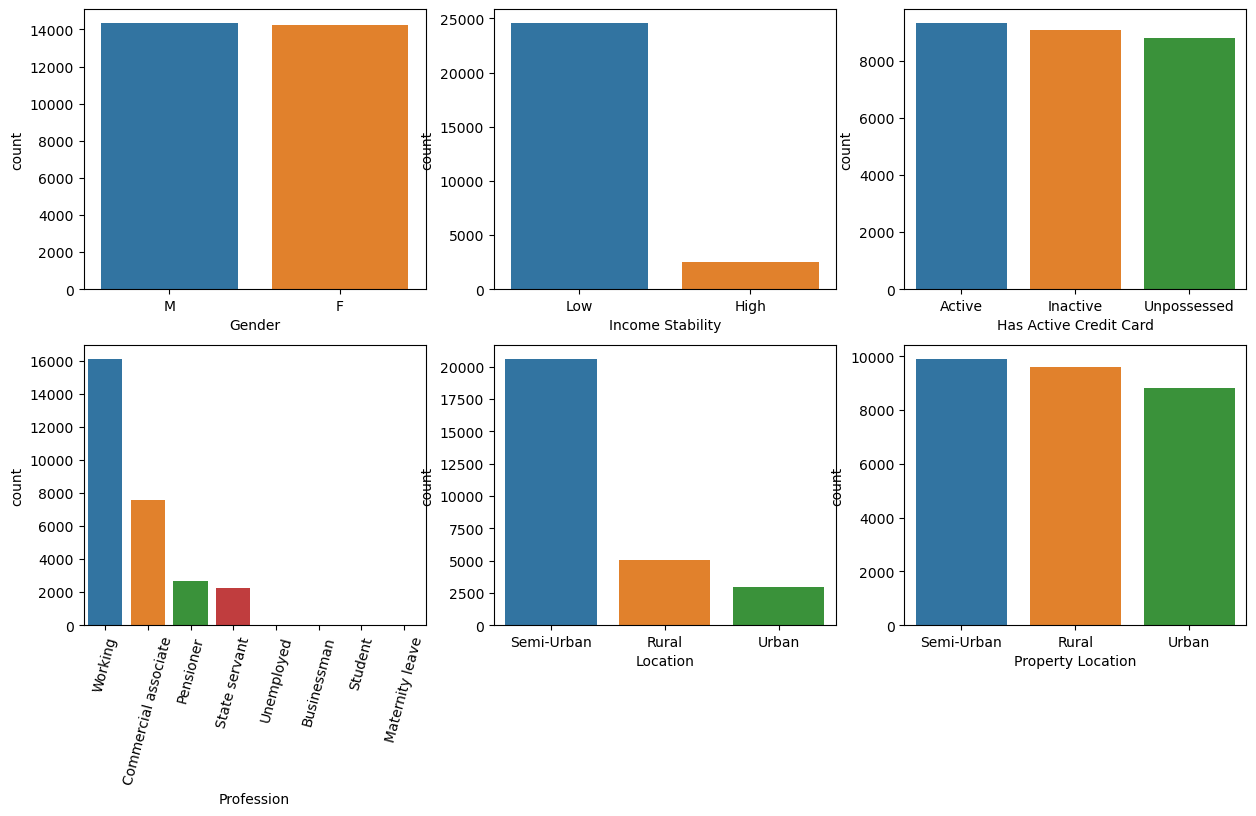

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))
gen=sns.countplot(df, x="Gender",ax=axs[0,0],order=df['Gender'].value_counts().index)
sns.countplot(df, x="Income Stability",ax=axs[0,1],order=df['Income Stability'].value_counts().index)
prof=sns.countplot(df, x="Profession",ax=axs[1,0],order=df['Profession'].value_counts().index)
prof.set_xticklabels(prof.get_xticklabels(), rotation=75)
sns.countplot(df, x="Location",ax=axs[1,1],order=df['Location'].value_counts().index)
sns.countplot(df, x="Has Active Credit Card",ax=axs[0,2],order=df['Has Active Credit Card'].value_counts().index)
sns.countplot(df, x="Property Location",ax=axs[1,2],order=df['Property Location'].value_counts().index)


<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

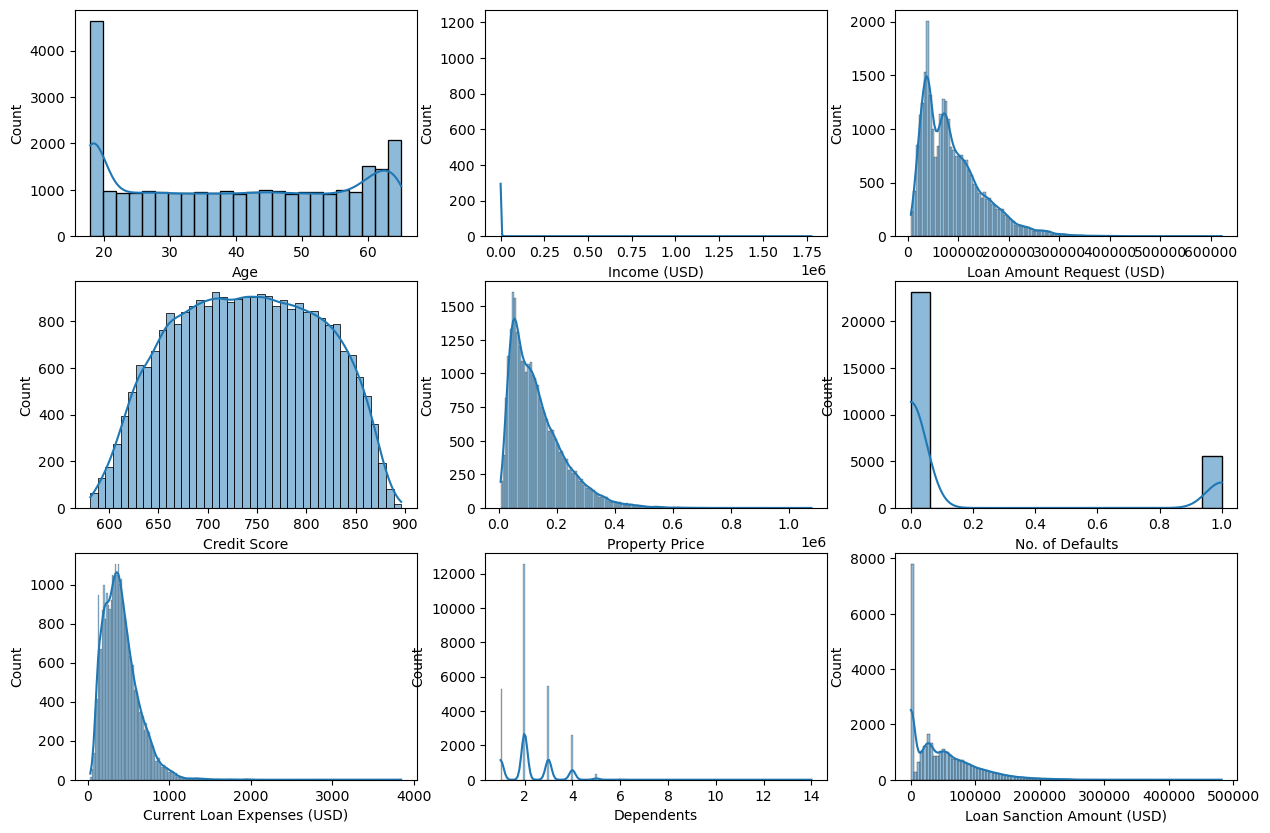

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))
sns.histplot(df['Age'],ax=axs[0,0],kde=True)
sns.histplot(df['Income (USD)'],ax=axs[0,1],kde=True)
sns.histplot(df['Loan Amount Request (USD)'],ax=axs[0,2],kde=True)
sns.histplot(df['Credit Score'],ax=axs[1,0],kde=True)
sns.histplot(df['Property Price'],ax=axs[1,1],kde=True)
sns.histplot(df['No. of Defaults'],ax=axs[1,2],kde=True)
sns.histplot(df['Current Loan Expenses (USD)'],ax=axs[2,0],kde=True)
sns.histplot(df['Dependents'],ax=axs[2,1],kde=True)
sns.histplot(df['Loan Sanction Amount (USD)'],ax=axs[2,2],kde=True)


Text(0.5, 1.0, 'Loan Sanction Amount (USD)')

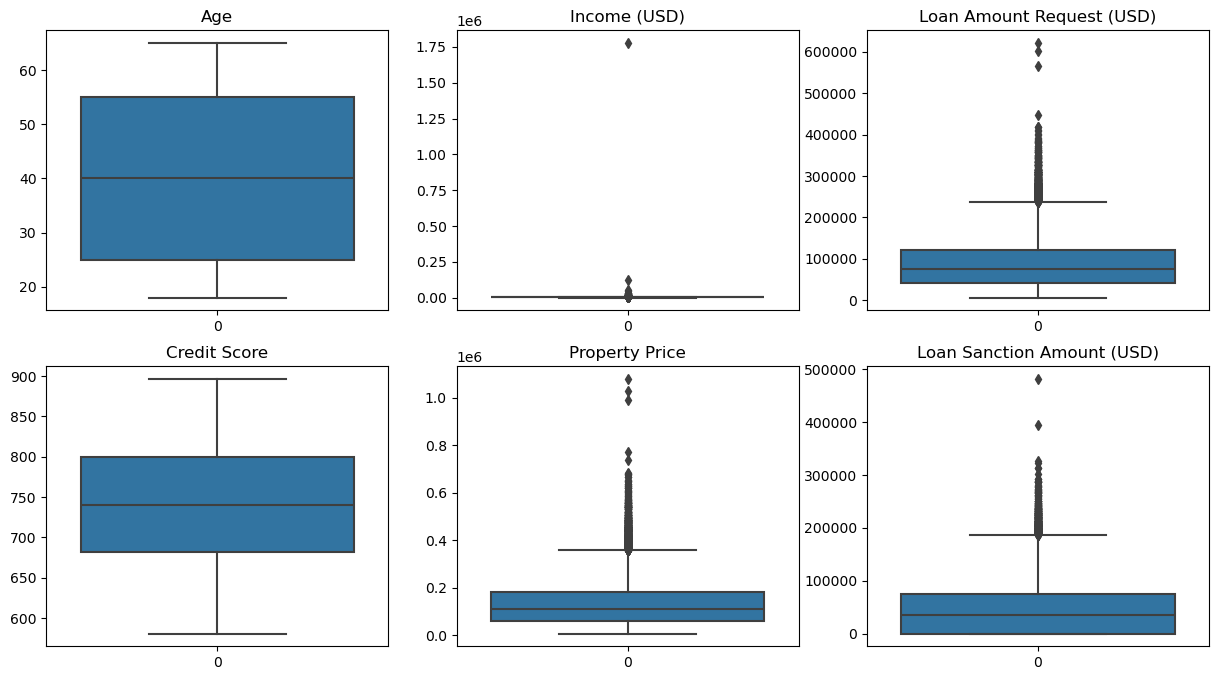

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))
sns.boxplot(df['Age'],ax=axs[0,0]).set_title("Age")
sns.boxplot(df['Income (USD)'],ax=axs[0,1]).set_title("Income (USD)")
sns.boxplot(df['Loan Amount Request (USD)'],ax=axs[0,2]).set_title("Loan Amount Request (USD)")
sns.boxplot(df['Credit Score'],ax=axs[1,0]).set_title("Credit Score")
sns.boxplot(df['Property Price'],ax=axs[1,1]).set_title("Property Price")
sns.boxplot(df['Loan Sanction Amount (USD)'],ax=axs[1,2]).set_title("Loan Sanction Amount (USD)")

<p style="color:yellow">We can see many 'zero' values in target feature which represent that no loan were sanctioned. Now, exporing our feature without zero.</p>

In [32]:
# Dataframe without zero value
target_without_zero = df[df['Loan Sanction Amount (USD)']>0]

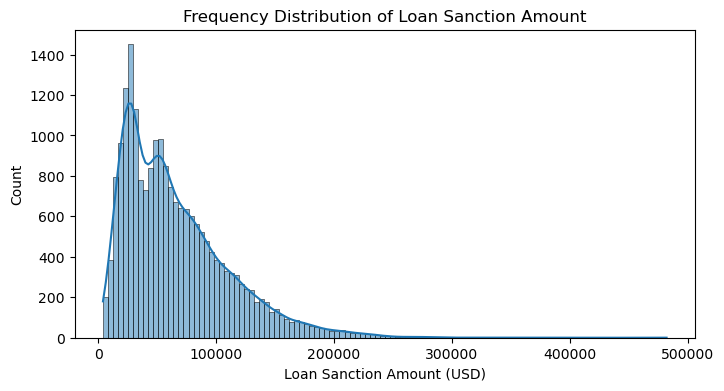

In [33]:
# Histogram Plot without zero
plt.figure(figsize=(8,4))
sns.histplot(target_without_zero['Loan Sanction Amount (USD)'], kde=True)
plt.title('Frequency Distribution of Loan Sanction Amount')
plt.show()

Text(0.5, 1.0, 'Loan Sanction Amount (USD)')

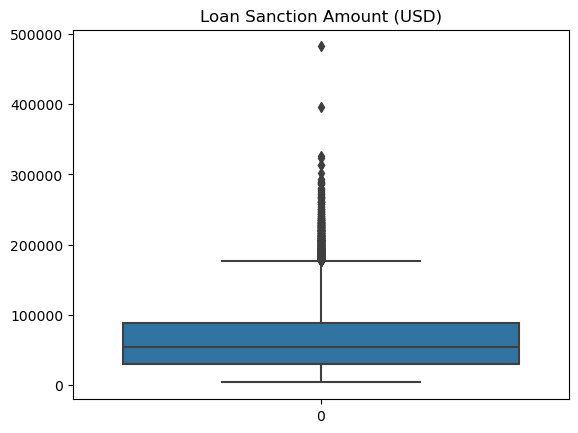

In [34]:
sns.boxplot(target_without_zero['Loan Sanction Amount (USD)']).set_title("Loan Sanction Amount (USD)")

<p style="color:yellow">Creating a new feature to denote whether the loan has sanctioned or not. This enable us to deal with both regression and classifiaction problems</p>

In [36]:
# Creating new feature
df['Loan sanctioned'] = df['Loan Sanction Amount (USD)']>0

<Axes: ylabel='count'>

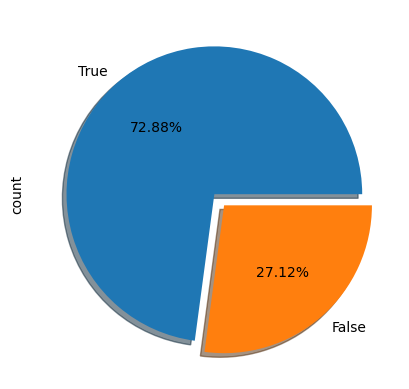

In [37]:
# Distribution of Loan sanctioned
df['Loan sanctioned'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0, 0.1], shadow=True)

## Multivariate Analysis

In [39]:
con_cols = df.select_dtypes(include=['int', 'float']).columns

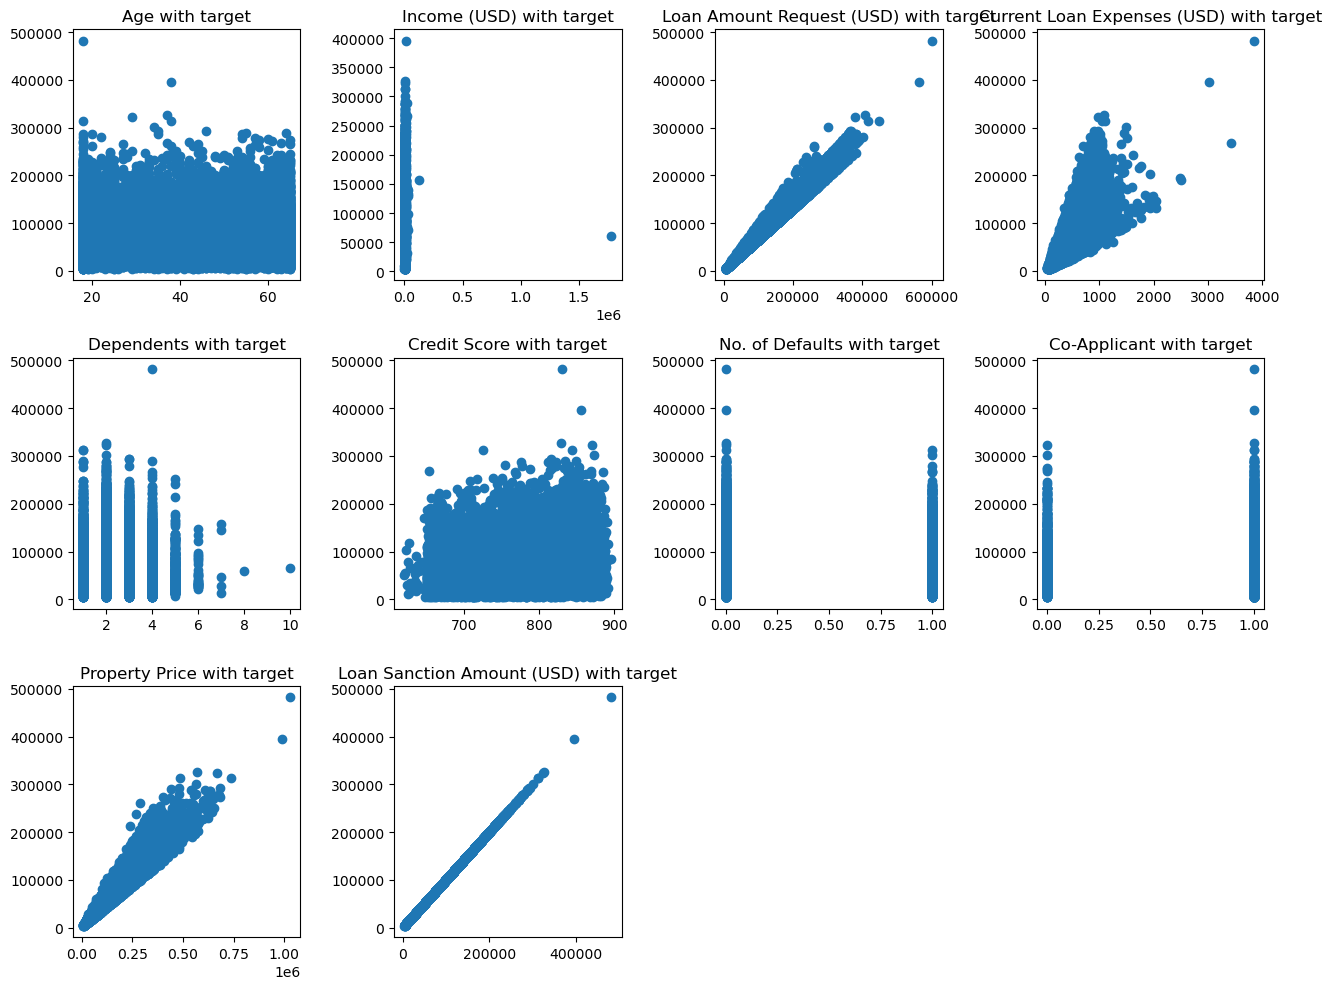

In [40]:
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    plt.subplot(3,4, index+1)
    plt.scatter(x=target_without_zero[col], y=target_without_zero['Loan Sanction Amount (USD)'])
    plt.title(f'{col} with target')
plt.tight_layout()

In [41]:
# Removing some points
out_vars = ['Income (USD)', 'Current Loan Expenses (USD)', 'Dependents']
df[out_vars] = df[out_vars].fillna(-1)

# Filtered dataframe
df = df[(df['Income (USD)']< 18000) & (df['Current Loan Expenses (USD)']<2500)]

# Replace -1 with nan
df.replace({-1, np.nan}, inplace=True)

In [42]:
target_without_zero =df[df['Loan Sanction Amount (USD)']>0]

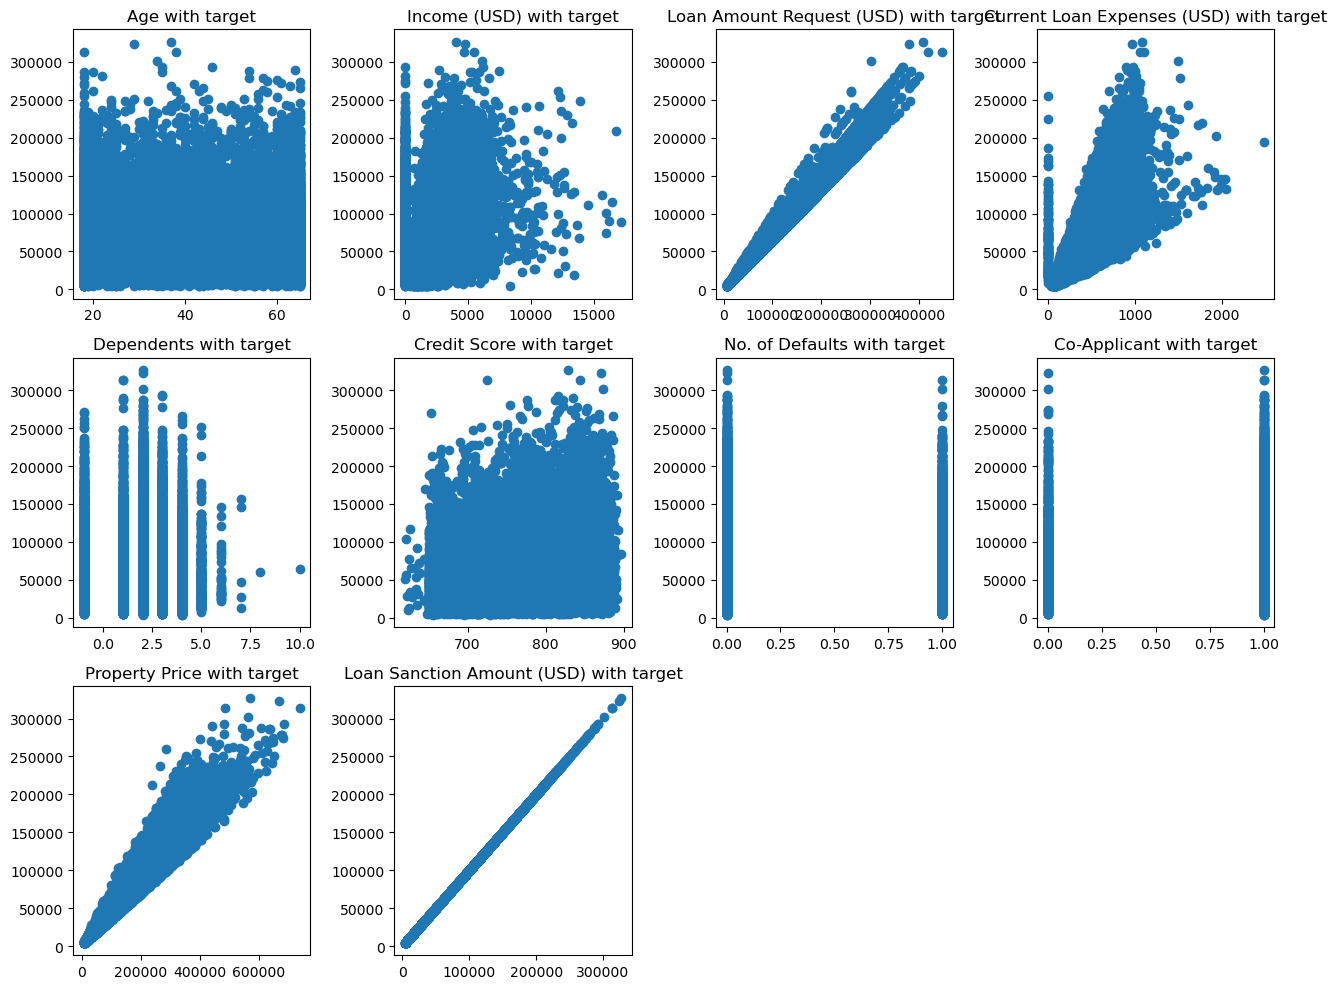

In [43]:
# Analysis for Regression after removing some points
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    plt.subplot(3,4, index+1)
    plt.scatter(x=target_without_zero[col], y=target_without_zero['Loan Sanction Amount (USD)'])
    plt.title(f'{col} with target')
plt.tight_layout()

Distribution of continuous features


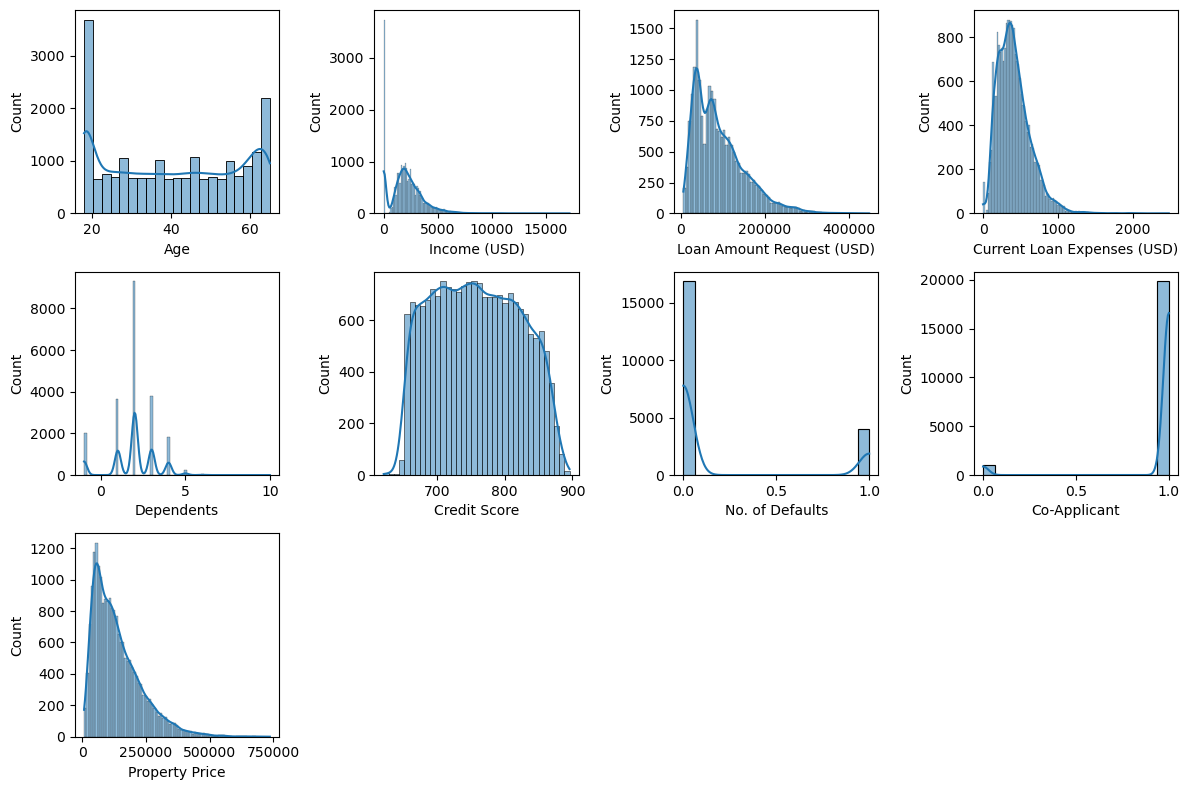

In [44]:
# Distribution plot
plt.figure(figsize=(12,8))
for index, col in enumerate(con_cols):
    if col =='Loan Sanction Amount (USD)':
        continue
        
    plt.subplot(3,4, index+1)
    sns.histplot(x=col, kde=True, data=target_without_zero)
    
print('Distribution of continuous features')
plt.tight_layout()

<p style="color:yellow">As can be seen. most continuous features do not have normal distribution</p>


## Categorical Analysis

In [47]:
cat_cols = df.drop(columns=['Loan sanctioned']).select_dtypes('object').columns
target_without_zero[cat_cols].head()

,Gender,Income Stability,Profession,Type of Employment,Location,Has Active Credit Card,Property Location
0,F,Low,Working,Sales staff,Semi-Urban,NaN,Rural
1,M,Low,Working,NaN,Semi-Urban,Unpossessed,Rural
2,F,High,Pensioner,NaN,Semi-Urban,Unpossessed,Urban
3,F,High,Pensioner,NaN,Rural,Unpossessed,Semi-Urban
4,F,Low,Working,High skill tech staff,Semi-Urban,Active,Semi-Urban


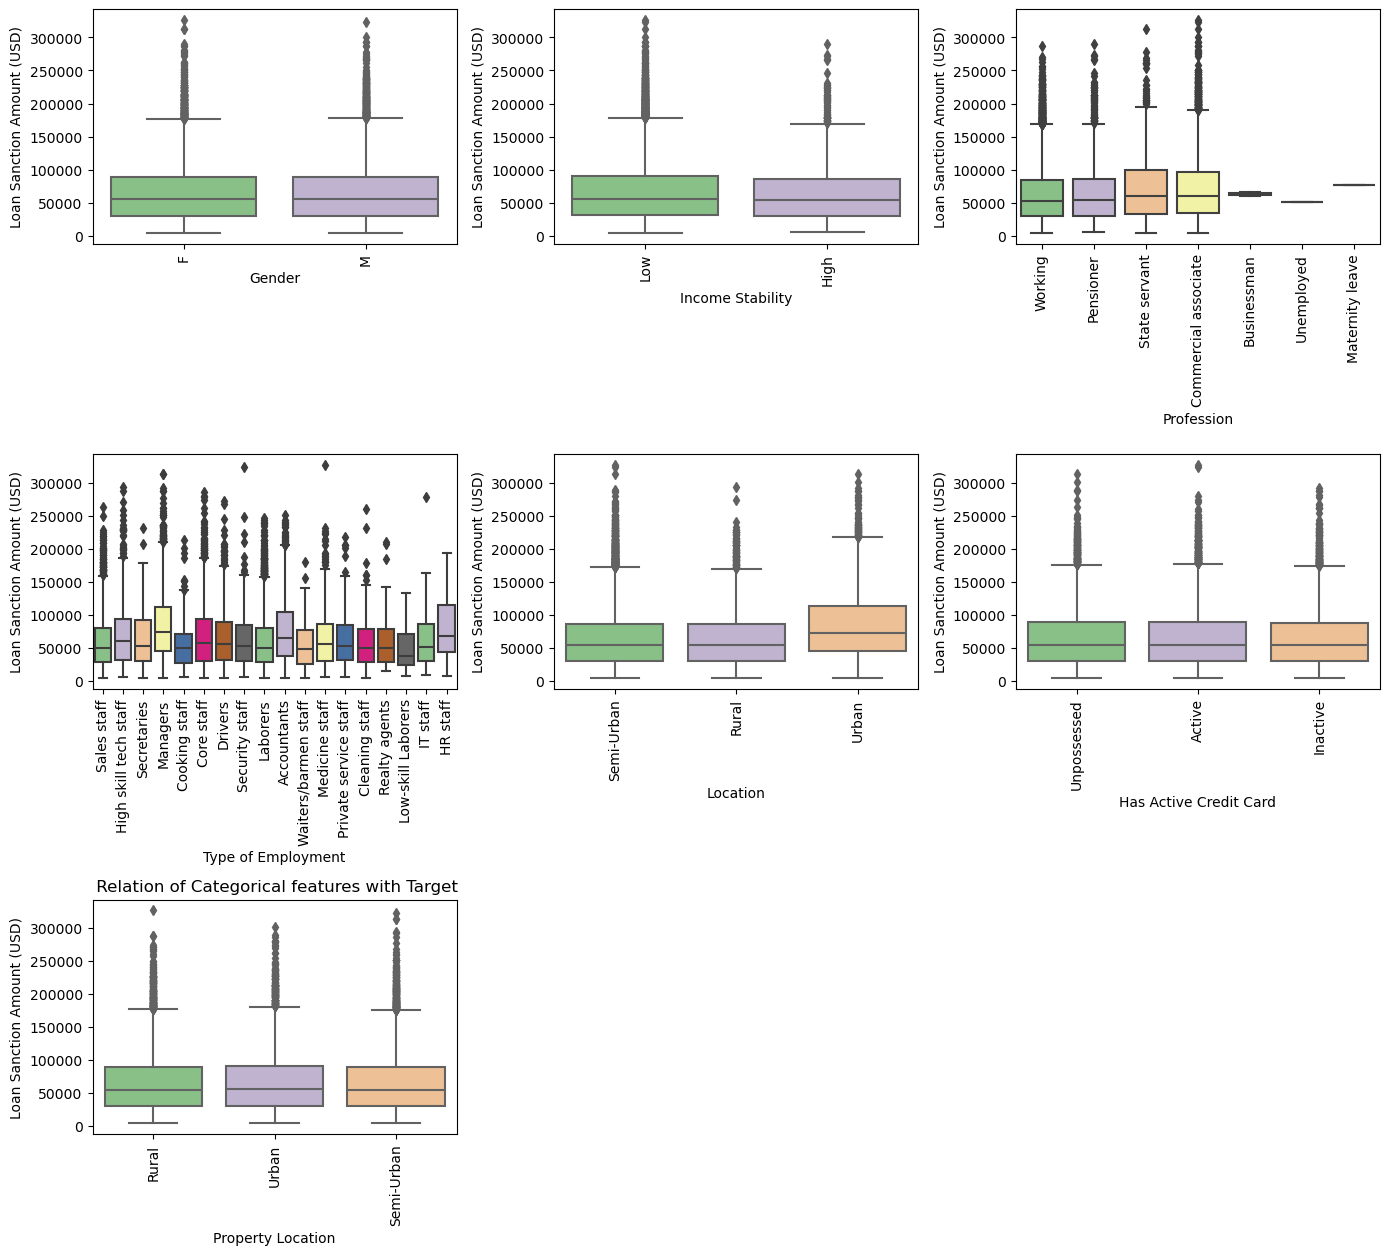

In [48]:
# Relation of categorical columns with target feature
plt.figure(figsize=(14,16))
for index, col in enumerate(cat_cols):
    plt.subplot(4,3, index+1)
    sns.boxplot(x=col, y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
    plt.xticks(rotation=90)
    
plt.title(' Relation of Categorical features with Target')
plt.tight_layout()

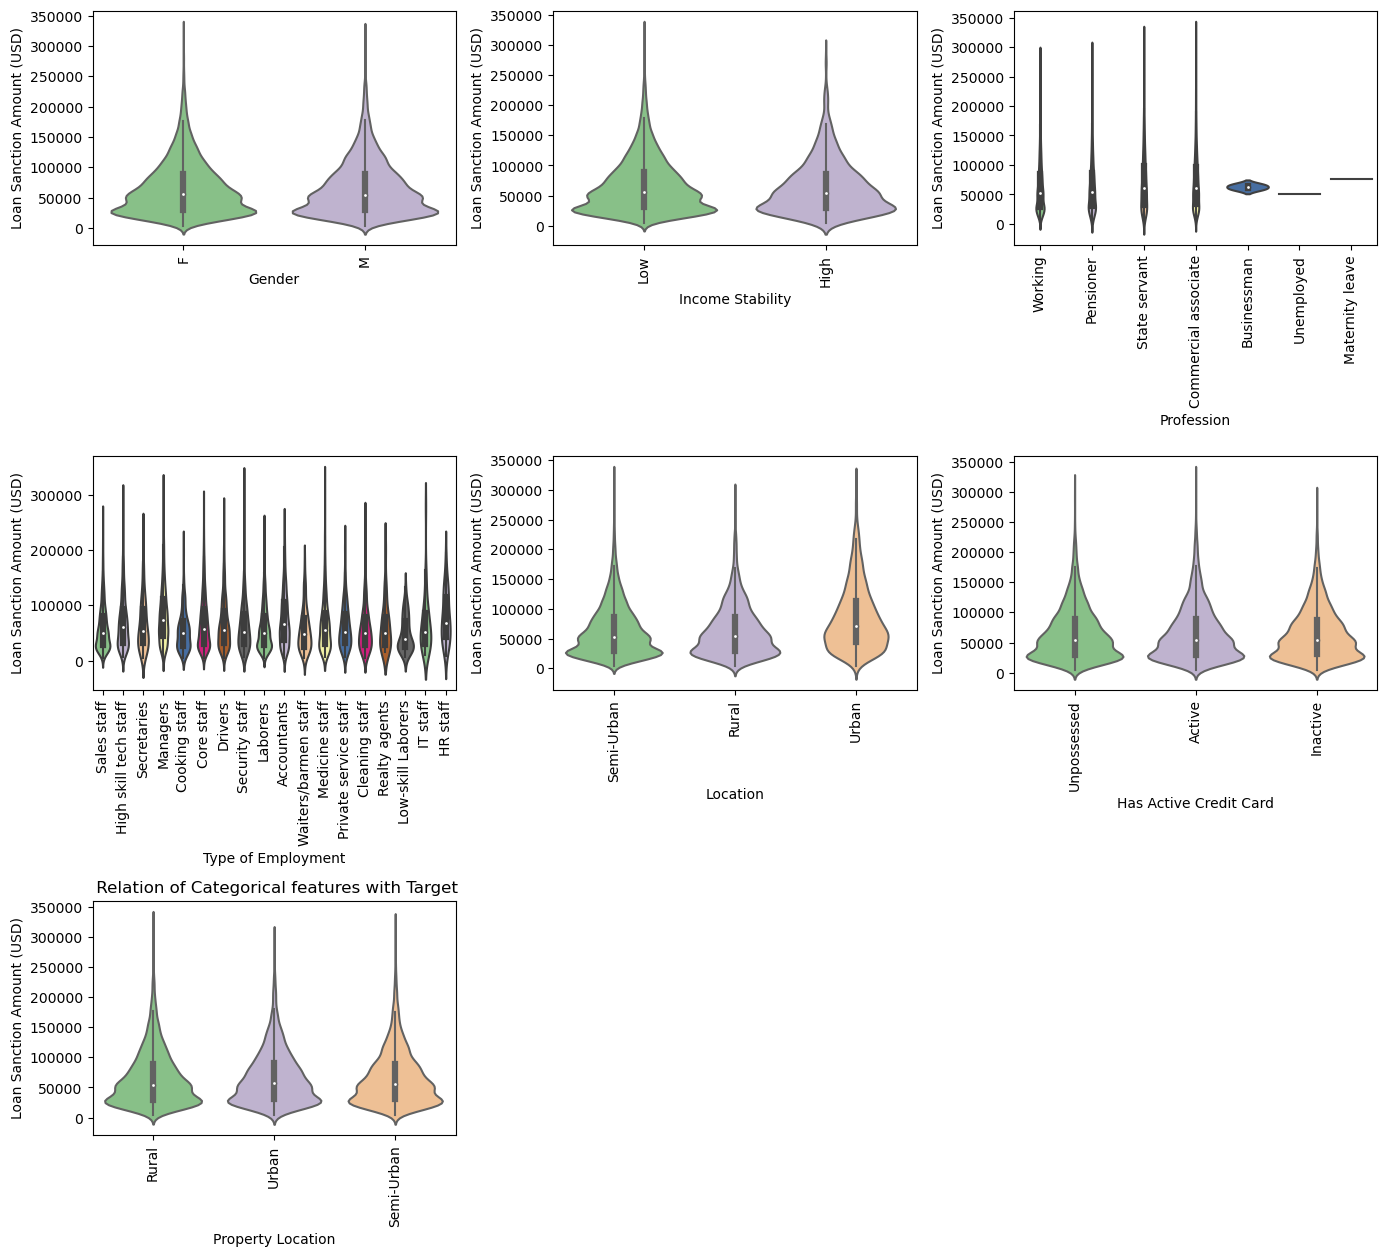

In [49]:
#violin plot
plt.figure(figsize=(14,16))
for index, col in enumerate(cat_cols):
    plt.subplot(4,3, index+1)
    sns.violinplot(x=col, y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
    plt.xticks(rotation=90)
    
plt.title(' Relation of Categorical features with Target')
plt.tight_layout()

## Exploring classification features

For calssificatio, we use 'Loan sanctioned' feature. But, loan sanction feature is not balanced. First, of all let's balance it using Under sampling technique

In [52]:
# We do not need Loan sanction amount feature as it is our target feature
df_clf = df.drop(columns=['Loan Sanction Amount (USD)'])
df_clf.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan sanctioned
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,3.0,809.44,0,NaN,Rural,1,119933.46,True
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,1.0,780.40,0,Unpossessed,Rural,1,54791.00,True
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,1.0,833.15,0,Unpossessed,Urban,0,72440.58,True
3,F,65,-1.00,High,Pensioner,NaN,Rural,80057.92,298.54,2.0,832.70,1,Unpossessed,Semi-Urban,1,121441.51,True
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,-1.0,745.55,1,Active,Semi-Urban,1,208567.91,True


In [53]:
# Balancing the dataset
false_count = df_clf['Loan sanctioned'].value_counts()[False]
df_true_sample = df_clf[df_clf['Loan sanctioned']==True].sample(false_count)
df_false_sample = df_clf[df_clf['Loan sanctioned']==False]

df_clf_sample = pd.concat([df_true_sample, df_false_sample])
df_clf_sample['Loan sanctioned'].value_counts()

Loan sanctioned
True     7770
False    7770
Name: count, dtype: int64

Distribution of features with loan sanctioned


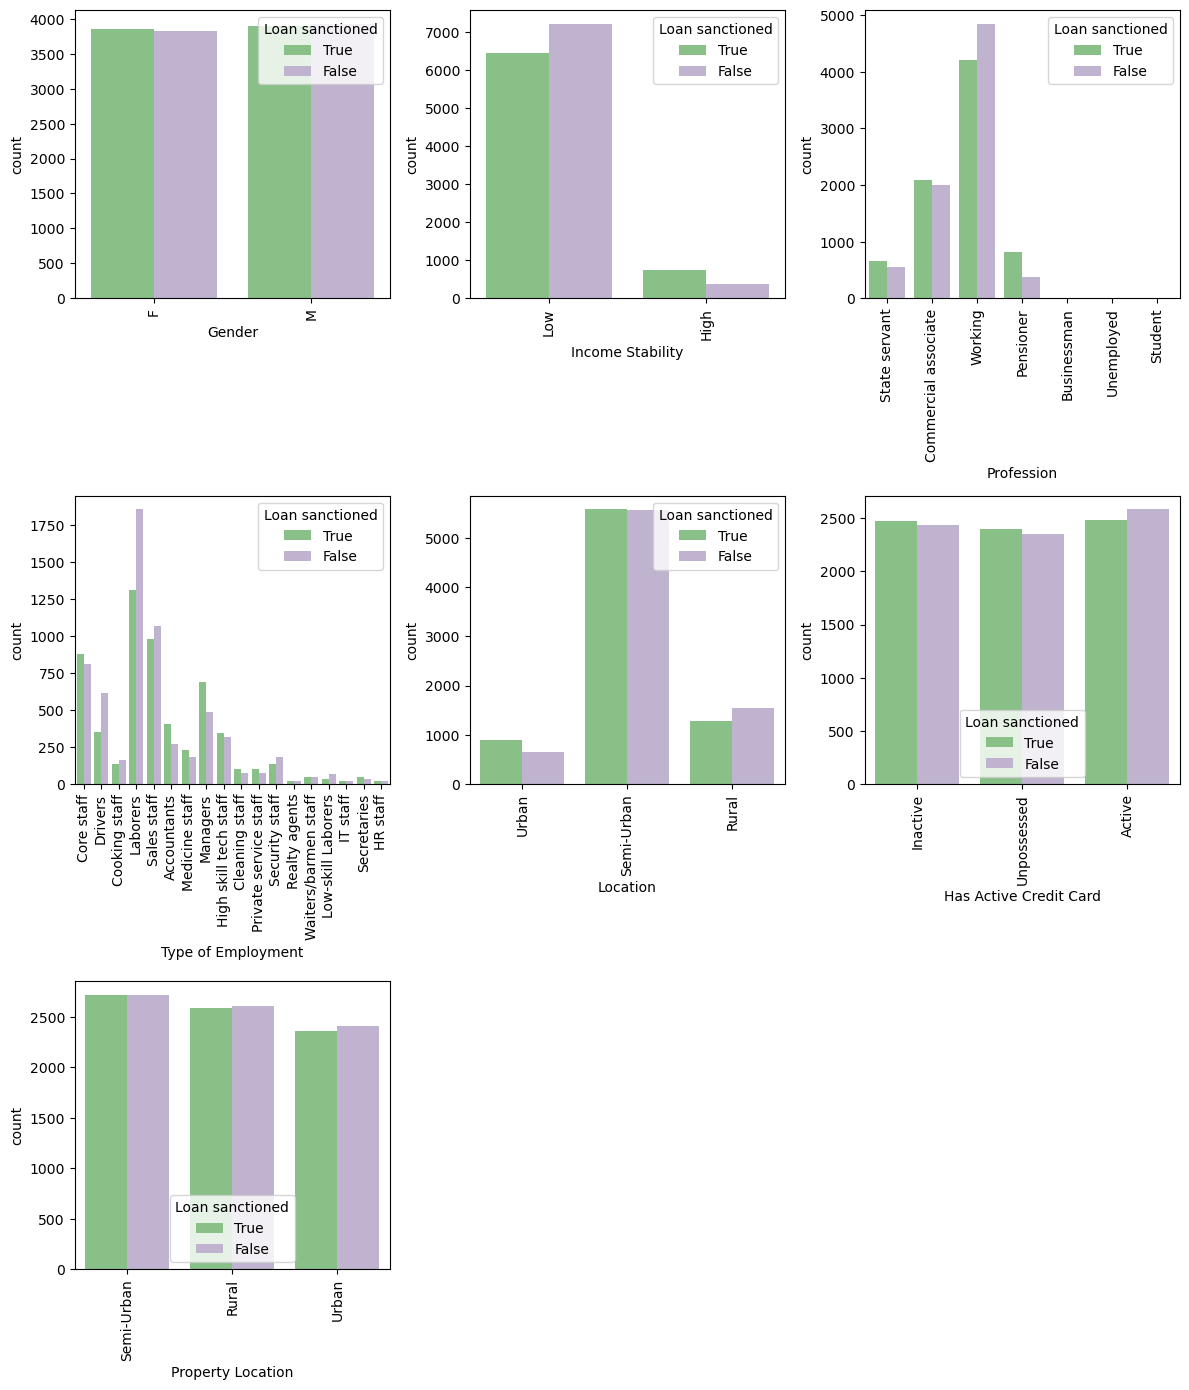

In [54]:
# Relatiob between categorical and loan sanctioned feature
df_clf_sample['Loan sanctioned'] =df_clf_sample['Loan sanctioned'].astype(str)
plt.figure(figsize=(12,14))
for index, col in enumerate(cat_cols):
    plt.subplot(3,3, index+1)
    sns.countplot(x=col, hue='Loan sanctioned', data=df_clf_sample, palette='Accent')
    plt.xticks(rotation=90)
    
print('Distribution of features with loan sanctioned')
plt.tight_layout()

Distribution of Continuous features with loan sanctioned


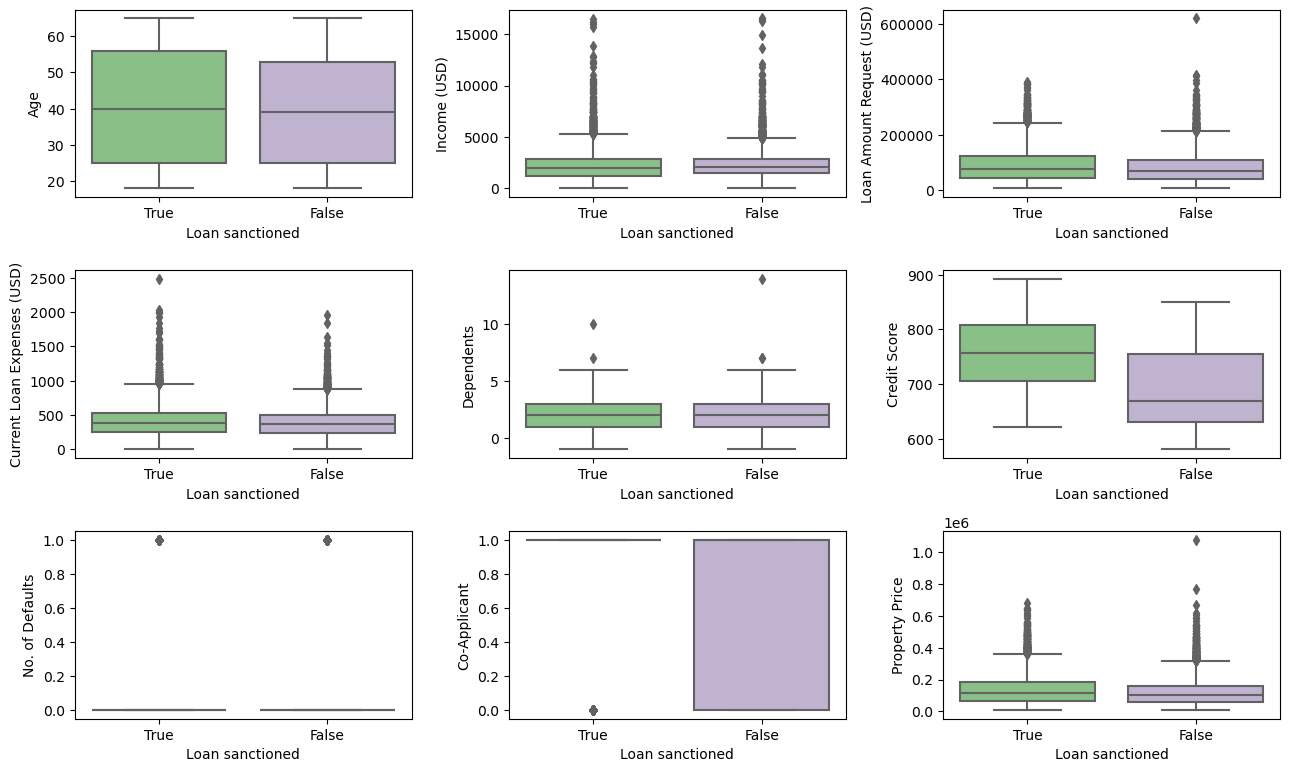

In [55]:
# Relation between continuous features with loan sanctioned
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    if col == 'Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.boxplot(x='Loan sanctioned', y=col, data=df_clf_sample, palette='Accent')
    
print('Distribution of Continuous features with loan sanctioned')
plt.tight_layout()

Distribution of Continuous features with loan sanctioned


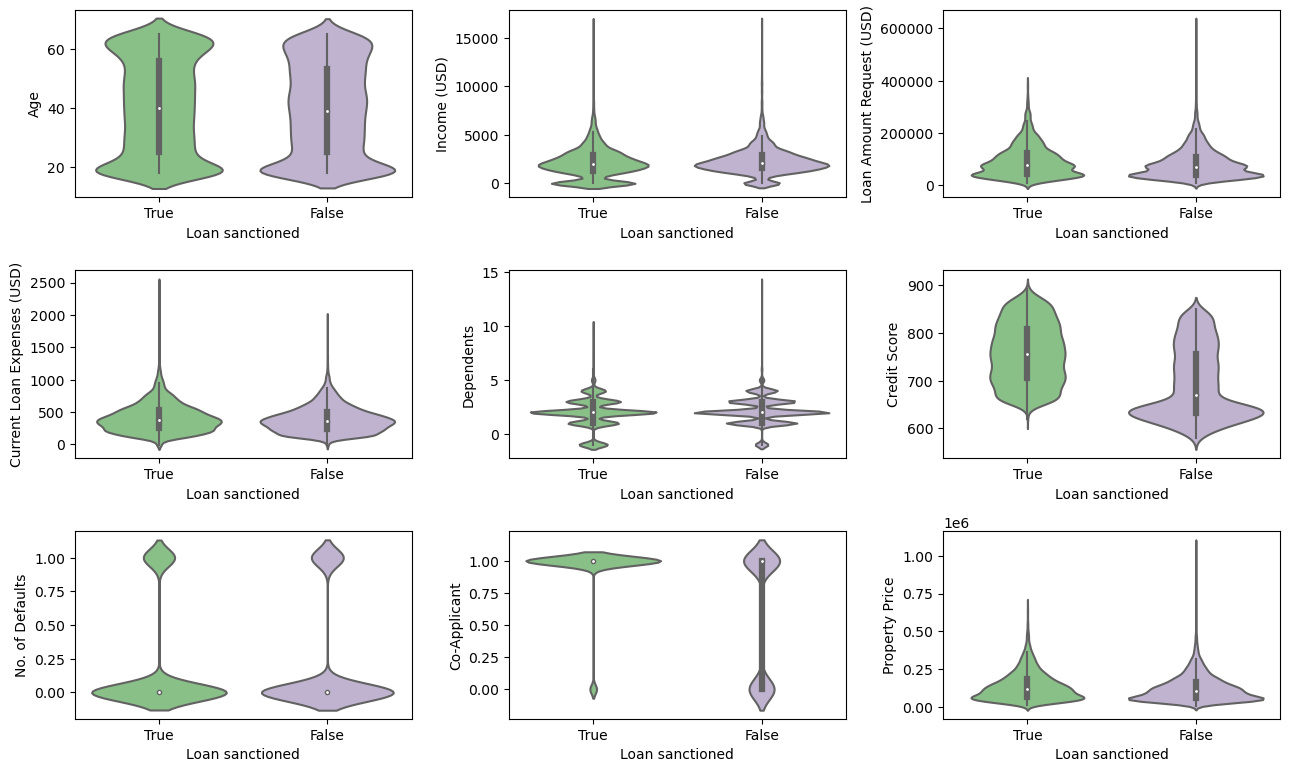

In [56]:
# Using violin plot for more clearer view
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    if col == 'Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.violinplot(x='Loan sanctioned', y=col, data=df_clf_sample, palette='Accent')
    
print('Distribution of Continuous features with loan sanctioned')
plt.tight_layout()

In [57]:
df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Location',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)',
       'Loan sanctioned'],
      dtype='object')

In [58]:
df_clf_sample.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Location',
       'Co-Applicant', 'Property Price', 'Loan sanctioned'],
      dtype='object')

Continuous features with Loan sanctioned :


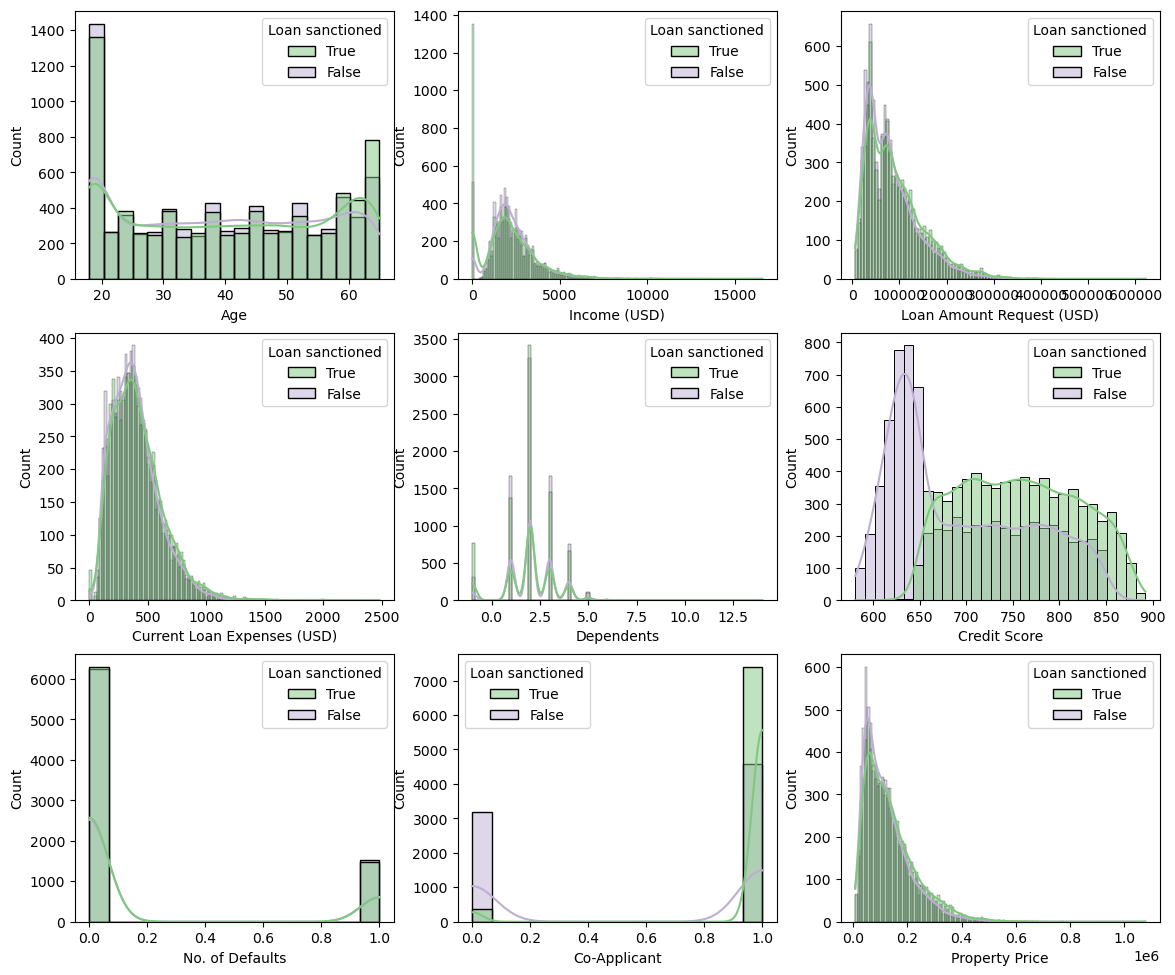

In [59]:
plt.figure(figsize=(14,16))
for index, col in enumerate(con_cols):
    if col =='Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.histplot(x=col, hue='Loan sanctioned', data=df_clf_sample, palette='Accent', kde=True)
print('Continuous features with Loan sanctioned :')
plt.show()

# Handling Missing Values

In [61]:
df.isna().sum().sort_values(ascending=False)

Type of Employment             6977
Credit Score                   1574
Income Stability               1572
Has Active Credit Card         1469
Property Location               324
Gender                           51
Loan Sanction Amount (USD)        0
Property Price                    0
Co-Applicant                      0
No. of Defaults                   0
Dependents                        0
Age                               0
Current Loan Expenses (USD)       0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Income (USD)                      0
Loan sanctioned                   0
dtype: int64

In [62]:
df

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,3.0,809.44,0,NaN,Rural,1,119933.46,54607.18,True
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,1.0,780.40,0,Unpossessed,Rural,1,54791.00,37469.98,True
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,1.0,833.15,0,Unpossessed,Urban,0,72440.58,36474.43,True
3,F,65,-1.00,High,Pensioner,NaN,Rural,80057.92,298.54,2.0,832.70,1,Unpossessed,Semi-Urban,1,121441.51,56040.54,True
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,-1.0,745.55,1,Active,Semi-Urban,1,208567.91,74008.28,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,2.0,869.61,0,Unpossessed,Urban,1,111096.56,68992.11,True
29996,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,3.0,729.41,0,Inactive,Urban,1,73453.94,46616.60,True
29997,F,49,-1.00,Low,Working,Sales staff,Urban,81410.08,583.11,-1.0,NaN,0,Active,Rural,1,102108.02,61057.56,True
29998,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,3.0,677.27,1,Unpossessed,Urban,1,168194.47,99766.87,True


In [63]:
df['Gender'].value_counts()

Gender
M    14360
F    14241
Name: count, dtype: int64

In [64]:
# Imputing the missing vales with most frequent class
nulls = df['Gender'].isna().sum()
most_frequent = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df['Gender'].isna().sum()}")

Missing values before imputation 51
Missing values after imputation 0


In [65]:
df['Property Location'].value_counts()

Property Location
Semi-Urban    9912
Rural         9613
Urban         8803
Name: count, dtype: int64

In [66]:
df["Has Active Credit Card"].value_counts()

Has Active Credit Card
Active         9330
Inactive       9057
Unpossessed    8796
Name: count, dtype: int64

In [67]:
# Imputing the missing vales with most frequent class
nulls = df['Has Active Credit Card'].isna().sum()
most_frequent = df['Has Active Credit Card'].mode()[0]
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df['Has Active Credit Card'].isna().sum()}")

Missing values before imputation 1469
Missing values after imputation 0


In [68]:
# Using median value to impute Credit Score feature
Credit_score_nulls = df['Credit Score'].isna().sum()
median_value =df['Credit Score'].median()

df['Credit Score'] = df['Credit Score'].fillna(median_value)

print(f"Number of missing values before is {Credit_score_nulls}")
print(f"Number of missing values after is {df['Credit Score'].isna().sum()}")

Number of missing values before is 1574
Number of missing values after is 0


In [69]:
df.isna().sum().sort_values(ascending=False)

Type of Employment             6977
Income Stability               1572
Property Location               324
Gender                            0
Credit Score                      0
Loan Sanction Amount (USD)        0
Property Price                    0
Co-Applicant                      0
Has Active Credit Card            0
No. of Defaults                   0
Dependents                        0
Age                               0
Current Loan Expenses (USD)       0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Income (USD)                      0
Loan sanctioned                   0
dtype: int64

In [70]:
df["Type of Employment"].value_counts()

Type of Employment
Laborers                 5330
Sales staff              3590
Core staff               3083
Managers                 2361
Drivers                  1530
Accountants              1311
High skill tech staff    1249
Medicine staff            821
Security staff            554
Cooking staff             538
Private service staff     322
Cleaning staff            322
Secretaries               154
Low-skill Laborers        145
Waiters/barmen staff      142
Realty agents              84
IT staff                   70
HR staff                   69
Name: count, dtype: int64

In [71]:
df['Profession'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [72]:
df[df['Profession']=='Pensioner'][['Profession', 'Type of Employment']].sample(10)

,Profession,Type of Employment
18870,Pensioner,NaN
8559,Pensioner,NaN
16526,Pensioner,NaN
24224,Pensioner,NaN
853,Pensioner,NaN
9579,Pensioner,NaN
12323,Pensioner,NaN
22360,Pensioner,NaN
2173,Pensioner,NaN
25412,Pensioner,NaN


It seems that there is no value assigned for Profession category on Type of Employment feature. So, we will assign a new category for it (i.e. Retired)

In [74]:
df.loc[df['Profession']=='Pensioner', 'Type of Employment']= 'Retired'

In [75]:
# Assigning new category for Unemployed (i.e. Unknown) for Type of Employment feature
df.loc[df['Profession']=='Unemployed', 'Type of Employment']= 'Unknown'

In [76]:
df['Type of Employment'].isna().sum()

4323

Still some of values are missing. I could not find any way to impute those values. So, let's create a new category named as 'Not available'

In [78]:
df['Type of Employment'] = df['Type of Employment'].fillna('Not available')

In [79]:
df['Type of Employment'].isna().sum()

0

In [80]:
df["Property Location"].value_counts()

Property Location
Semi-Urban    9912
Rural         9613
Urban         8803
Name: count, dtype: int64

In [81]:
# Imputing the missing vales with most frequent class
nulls = df['Property Location'].isna().sum()
most_frequent = df['Property Location'].mode()[0]
df['Property Location'] = df['Property Location'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df['Property Location'].isna().sum()}")

Missing values before imputation 324
Missing values after imputation 0


In [82]:
df["Income Stability"].value_counts()

Income Stability
Low     24594
High     2486
Name: count, dtype: int64

In [83]:
# Imputing the missing vales with most frequent class
nulls = df['Income Stability'].isna().sum()
most_frequent = df['Income Stability'].mode()[0]
df['Income Stability'] = df['Income Stability'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df['Income Stability'].isna().sum()}")

Missing values before imputation 1572
Missing values after imputation 0


In [84]:
df.dropna(inplace=True)

In [85]:
df.isna().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
Loan sanctioned                0
dtype: int64

In [86]:
df.shape

(28652, 18)

# Feature Engineering

In [88]:
df['Profession'].value_counts()

Profession
Working                 16145
Commercial associate     7594
Pensioner                2652
State servant            2255
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: count, dtype: int64

Some categories of Profession feature has very low frequency. So, we put all of them into a single category

In [90]:
counts = df['Profession'].value_counts()
threshold = 100
repl = counts[counts <threshold].index

df['Profession'] = df['Profession'].replace(repl, 'others')

In [91]:
df['Profession'].value_counts()

Profession
Working                 16145
Commercial associate     7594
Pensioner                2652
State servant            2255
others                      6
Name: count, dtype: int64

## Outlier Handling

### For Regression

In [94]:
df['No. of Defaults'].value_counts()

No. of Defaults
0    23097
1     5555
Name: count, dtype: int64

In [95]:
df['Dependents'].value_counts()

Dependents
 2.0     12540
 3.0      5474
 1.0      5307
 4.0      2599
-1.0      2319
 5.0       355
 6.0        48
 7.0         7
 8.0         1
 10.0        1
 14.0        1
Name: count, dtype: int64

In [96]:
df[df['Current Loan Expenses (USD)']==-1]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
271,F,32,1917.54,Low,Commercial associate,Sales staff,Semi-Urban,110305.49,-1.0,3.0,737.47,1,Unpossessed,Rural,1,170604.80,71698.57,True
358,M,18,1931.42,Low,Commercial associate,Accountants,Rural,23054.82,-1.0,3.0,740.04,0,Inactive,Urban,1,32068.05,16138.37,True
806,F,18,4271.61,Low,Working,Accountants,Semi-Urban,230652.53,-1.0,1.0,805.04,0,Active,Urban,1,305605.66,172989.40,True
1022,M,18,3751.77,Low,Working,Laborers,Semi-Urban,84041.66,-1.0,2.0,617.45,0,Active,Rural,1,105826.91,0.00,False
1192,F,63,-1.00,High,Pensioner,Retired,Semi-Urban,117132.81,-1.0,1.0,879.59,0,Inactive,Urban,1,157503.64,81992.97,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28890,M,22,2826.89,Low,Commercial associate,Laborers,Semi-Urban,80474.73,-1.0,1.0,652.95,0,Active,Rural,1,128545.27,56332.31,True
29271,M,56,2622.65,Low,Working,Managers,Semi-Urban,34305.77,-1.0,3.0,692.05,0,Inactive,Urban,1,41663.51,24014.04,True
29390,M,41,-1.00,Low,Commercial associate,Laborers,Semi-Urban,26777.25,-1.0,3.0,686.51,0,Unpossessed,Rural,1,45498.98,17405.21,True
29512,F,60,-1.00,Low,Working,Drivers,Rural,101510.90,-1.0,2.0,740.04,1,Active,Urban,1,185816.18,76133.17,True


In [97]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,2.865200e+04,28652.000000
mean,40.123866,2161.105470,88746.664751,406.220992,1.990437,740.011659,0.193878,0.852436,1.331337e+05,47984.658105
std,16.062760,1559.018613,59269.475071,215.583360,1.272967,70.130761,0.395342,0.354673,9.240197e+04,48073.084517
min,18.000000,-1.000000,6048.240000,-1.000000,-1.000000,580.850000,0.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1293.090000,41237.795000,247.860000,1.000000,685.370000,0.000000,1.000000,6.196691e+04,0.000000
50%,40.000000,2007.005000,75061.220000,375.110000,2.000000,740.040000,0.000000,1.000000,1.112171e+05,35821.685000
75%,55.000000,2869.920000,119853.202500,520.915000,3.000000,795.380000,0.000000,1.000000,1.799754e+05,74625.670000
max,65.000000,17162.800000,621497.820000,2481.220000,14.000000,896.260000,1.000000,1.000000,1.077967e+06,326730.560000


In [98]:
# Replacing -1 with 0
df['Income (USD)'] =df['Income (USD)'].replace({-1 : 0})
df['Current Loan Expenses (USD)'] =df['Current Loan Expenses (USD)'].replace({-1 : 0})
df['Dependents'] = df['Dependents'].replace(-1, 0) 

In [99]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,28652.000000,2.865200e+04,28652.000000
mean,40.123866,2161.253976,88746.664751,406.226542,2.071374,740.011659,0.193878,0.852436,1.331337e+05,47984.658105
std,16.062760,1558.812679,59269.475071,215.572890,1.100338,70.130761,0.395342,0.354673,9.240197e+04,48073.084517
min,18.000000,0.000000,6048.240000,0.000000,0.000000,580.850000,0.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1293.090000,41237.795000,247.860000,1.000000,685.370000,0.000000,1.000000,6.196691e+04,0.000000
50%,40.000000,2007.005000,75061.220000,375.110000,2.000000,740.040000,0.000000,1.000000,1.112171e+05,35821.685000
75%,55.000000,2869.920000,119853.202500,520.915000,3.000000,795.380000,0.000000,1.000000,1.799754e+05,74625.670000
max,65.000000,17162.800000,621497.820000,2481.220000,14.000000,896.260000,1.000000,1.000000,1.077967e+06,326730.560000


In [100]:
q1 = df['Income (USD)'].quantile(0.25)
q3 = df['Income (USD)'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - (whisker_width * iqr)
upper_whisker = q3 + (whisker_width * iqr)
df[df['Income (USD)']<lower_whisker]
df[df['Income (USD)']>upper_whisker]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
27,F,18,5350.94,Low,Commercial associate,Managers,Semi-Urban,99492.44,516.71,2.0,733.68,0,Inactive,Rural,0,188950.33,0.00,False
36,F,61,5302.28,Low,Working,Accountants,Rural,186715.38,527.81,1.0,748.38,0,Active,Semi-Urban,1,270558.30,121365.00,True
39,M,18,7885.56,Low,Commercial associate,Managers,Urban,121963.50,587.80,1.0,721.18,1,Unpossessed,Urban,1,142645.25,85374.45,True
41,F,54,5330.72,Low,Working,Managers,Semi-Urban,133531.81,535.77,1.0,861.21,1,Active,Urban,1,170214.99,100148.86,True
57,M,43,5445.60,Low,Commercial associate,Laborers,Semi-Urban,58236.85,435.07,2.0,718.89,0,Inactive,Semi-Urban,1,72025.12,40765.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29851,M,26,5407.64,Low,Commercial associate,Drivers,Urban,149353.27,622.95,3.0,689.65,0,Unpossessed,Rural,1,214949.65,0.00,False
29853,F,61,13646.44,Low,Commercial associate,Managers,Urban,106238.68,520.38,4.0,788.25,0,Active,Urban,1,119834.97,84990.94,True
29878,F,60,5681.69,High,Pensioner,Retired,Semi-Urban,146890.35,775.61,1.0,741.91,0,Active,Rural,0,221913.25,95478.73,True
29904,M,60,6685.40,Low,Commercial associate,Core staff,Urban,281341.55,730.34,2.0,791.53,1,Active,Rural,1,498738.14,211006.16,True


In [101]:
df_reg=df[df['Loan Sanction Amount (USD)']>0]

In [102]:
numeric_columns = df_reg.select_dtypes(include=['number']).columns

In [103]:
numeric_columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

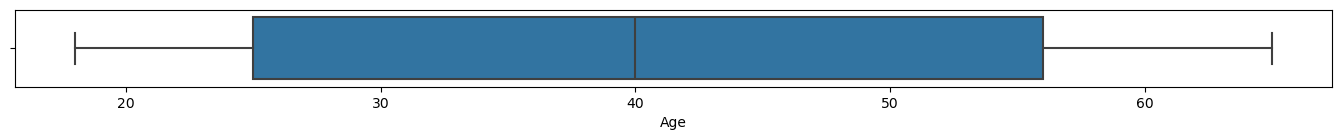

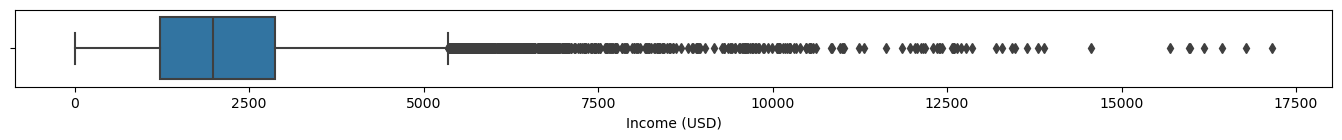

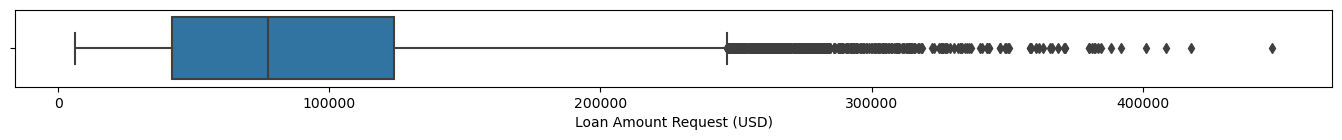

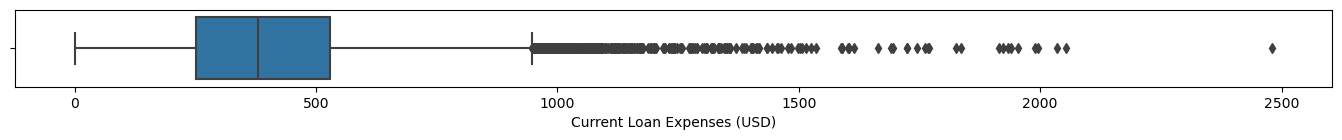

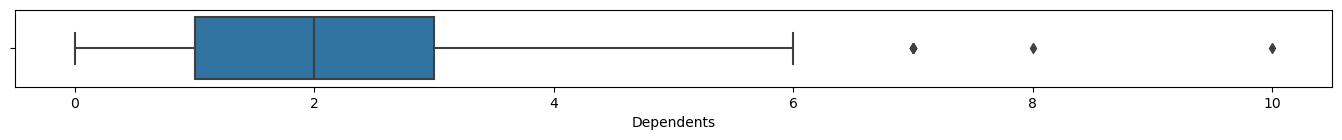

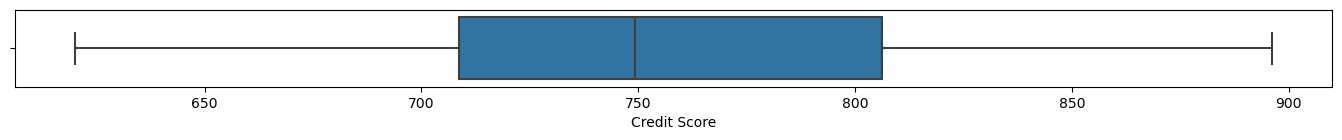

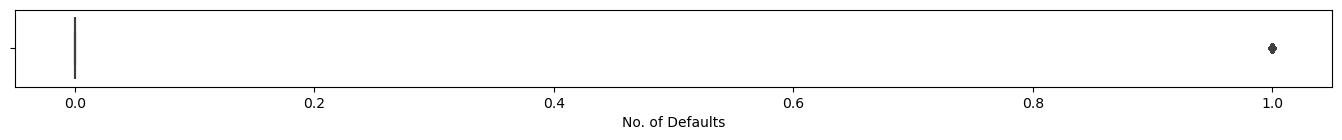

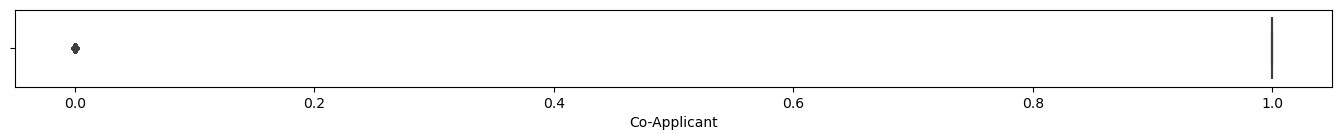

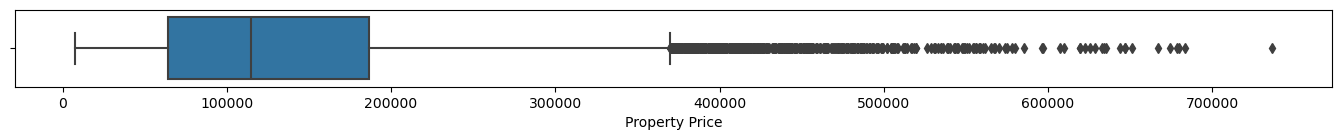

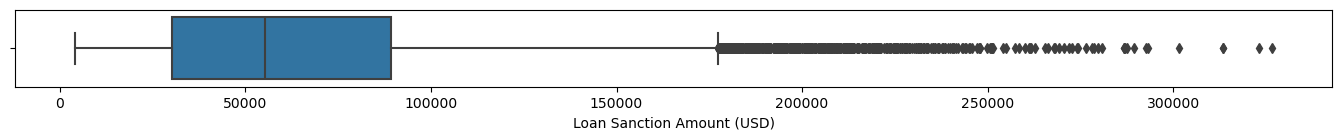

In [104]:
for col in numeric_columns:
    plt.figure(figsize = (17, 1))
    sns.boxplot(data = df_reg, x = col)

In [105]:
q1 = df_reg['Income (USD)'].quantile(0.25)
q3 = df_reg['Income (USD)'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - (whisker_width * iqr)
upper_whisker = q3 + (whisker_width * iqr)
df_reg[df_reg['Income (USD)']<lower_whisker]
df_reg[df_reg['Income (USD)']>upper_whisker]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
39,M,18,7885.56,Low,Commercial associate,Managers,Urban,121963.50,587.80,1.0,721.18,1,Unpossessed,Urban,1,142645.25,85374.45,True
57,M,43,5445.60,Low,Commercial associate,Laborers,Semi-Urban,58236.85,435.07,2.0,718.89,0,Inactive,Semi-Urban,1,72025.12,40765.80,True
95,F,51,6060.90,Low,Working,Managers,Urban,102169.74,738.55,3.0,851.94,1,Inactive,Rural,1,139187.56,86844.28,True
101,M,65,6446.85,High,Pensioner,Retired,Semi-Urban,37067.92,197.19,1.0,717.87,0,Active,Urban,0,62892.32,24094.15,True
146,M,51,6014.80,Low,Commercial associate,Not available,Urban,137881.43,704.56,5.0,758.89,0,Unpossessed,Semi-Urban,1,201934.97,96517.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29846,F,48,10474.05,Low,Commercial associate,High skill tech staff,Urban,133472.00,433.76,3.0,789.84,0,Active,Semi-Urban,1,212100.13,100104.00,True
29853,F,61,13646.44,Low,Commercial associate,Managers,Urban,106238.68,520.38,4.0,788.25,0,Active,Urban,1,119834.97,84990.94,True
29878,F,60,5681.69,High,Pensioner,Retired,Semi-Urban,146890.35,775.61,1.0,741.91,0,Active,Rural,0,221913.25,95478.73,True
29904,M,60,6685.40,Low,Commercial associate,Core staff,Urban,281341.55,730.34,2.0,791.53,1,Active,Rural,1,498738.14,211006.16,True


In [106]:
q1 = df_reg['Loan Sanction Amount (USD)'].quantile(0.25)
q3 = df_reg['Loan Sanction Amount (USD)'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - (whisker_width * iqr)
upper_whisker = q3 + (whisker_width * iqr)
df_reg[df_reg['Loan Sanction Amount (USD)']<lower_whisker]
df_reg[df_reg['Loan Sanction Amount (USD)']>upper_whisker]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
87,F,61,0.00,High,Pensioner,Retired,Urban,258359.02,938.59,3.0,791.54,0,Active,Rural,1,437535.71,193769.26,True
141,F,42,2462.09,Low,Working,Realty agents,Rural,262719.40,702.81,3.0,798.13,0,Active,Rural,1,336636.40,183903.58,True
215,M,64,5939.78,High,Pensioner,Retired,Urban,290858.74,856.03,2.0,870.22,0,Active,Rural,0,491475.67,218144.06,True
247,M,52,3019.22,Low,Working,Core staff,Rural,282407.38,971.44,2.0,699.81,1,Unpossessed,Urban,1,368376.84,197685.17,True
267,M,25,0.00,Low,State servant,Medicine staff,Urban,249733.19,666.17,1.0,845.35,0,Unpossessed,Semi-Urban,1,390337.74,187299.89,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29658,F,53,4777.81,Low,Working,Managers,Semi-Urban,314413.97,818.16,5.0,804.01,0,Active,Semi-Urban,1,585264.20,251531.18,True
29811,F,22,5002.09,Low,Working,Accountants,Urban,258030.61,799.08,2.0,717.02,0,Unpossessed,Semi-Urban,1,451889.33,180621.43,True
29833,M,60,7074.18,High,Pensioner,Retired,Semi-Urban,258810.42,694.23,2.0,656.11,0,Inactive,Rural,0,371981.50,181167.29,True
29904,M,60,6685.40,Low,Commercial associate,Core staff,Urban,281341.55,730.34,2.0,791.53,1,Active,Rural,1,498738.14,211006.16,True


In [107]:
col_out=['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'Property Price',
       'Loan Sanction Amount (USD)','Dependents']

In [108]:
for col in col_out:
    q1 = df_reg[col].quantile(0.25)
    q3 = df_reg[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + (whisker_width * iqr)
    df_reg[df_reg[col]<lower_whisker]
    df_reg[df_reg[col]>upper_whisker]
    df_reg[col] = np.where(df_reg[col] > upper_whisker, upper_whisker, np.where(df_reg[col] < lower_whisker, lower_whisker, df_reg[col]))

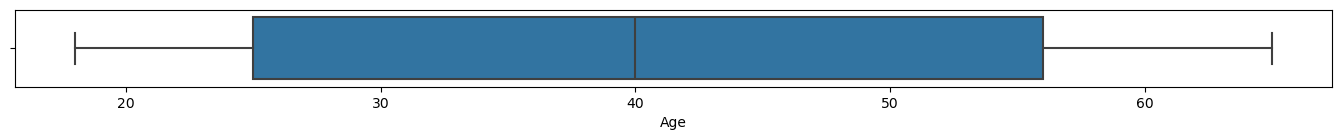

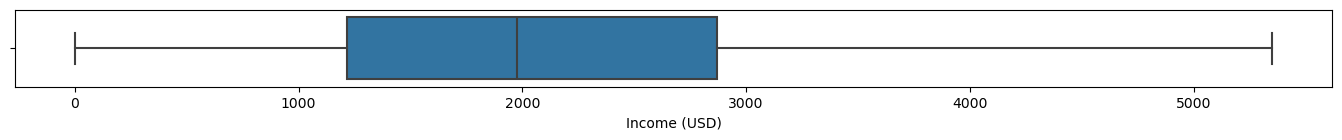

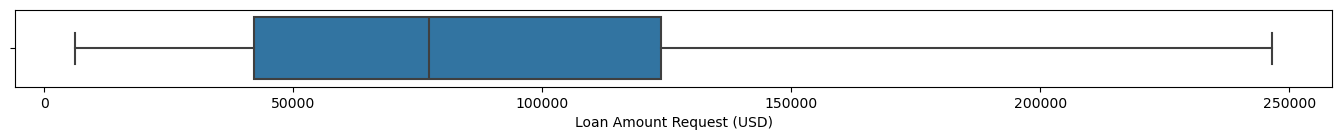

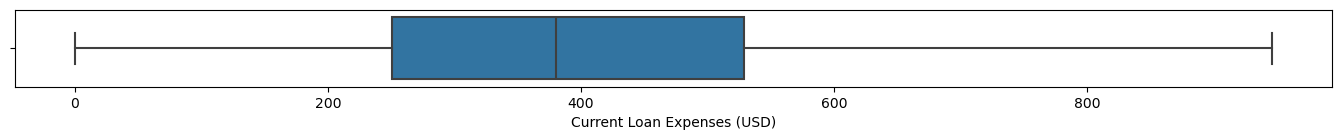

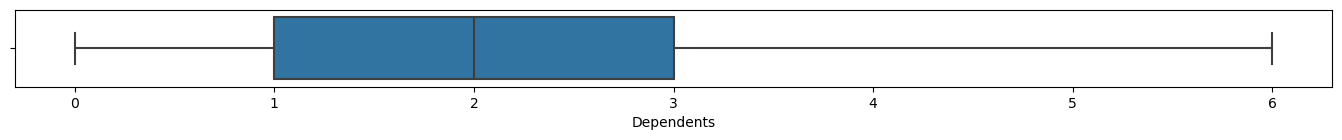

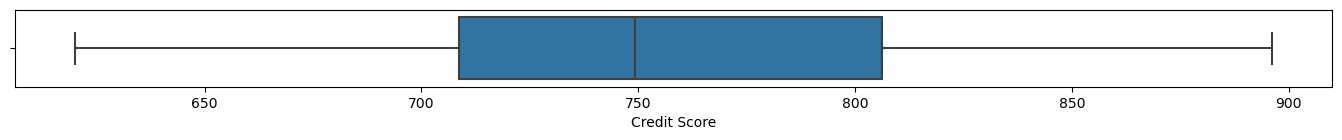

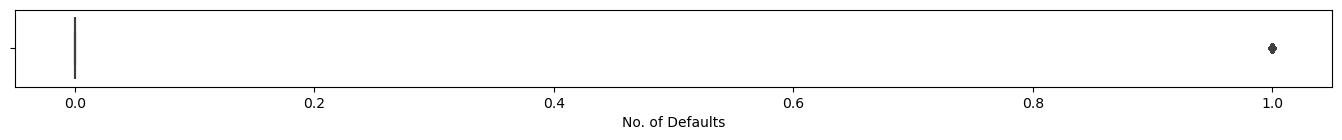

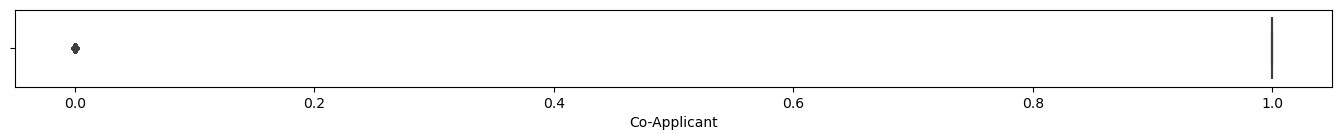

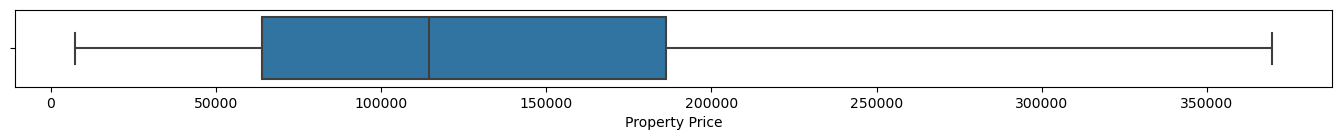

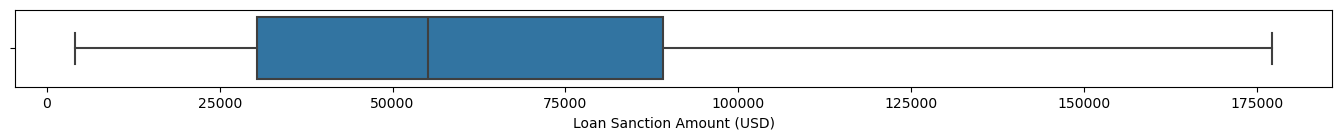

In [109]:
for col in numeric_columns:
    plt.figure(figsize = (17, 1))
    sns.boxplot(data = df_reg, x = col)

### For Classification

In [111]:
df_clf = df.drop(columns=['Loan Sanction Amount (USD)'])
df_clf.sample(6)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan sanctioned
9524,F,60,2120.17,High,Pensioner,Retired,Semi-Urban,25257.31,157.19,3.0,740.04,0,Active,Rural,0,44872.83,True
5291,F,56,1328.99,Low,State servant,Core staff,Semi-Urban,27628.01,131.43,4.0,710.39,1,Active,Semi-Urban,1,35576.53,True
9417,F,50,2468.74,Low,Commercial associate,Core staff,Semi-Urban,61645.26,293.69,1.0,629.21,0,Unpossessed,Rural,1,69616.22,False
4450,F,47,2308.53,Low,Working,Laborers,Semi-Urban,82123.33,482.70,4.0,740.04,0,Inactive,Rural,1,122948.18,True
3776,M,24,1266.07,Low,Commercial associate,Sales staff,Semi-Urban,52298.06,266.51,6.0,780.56,1,Unpossessed,Semi-Urban,1,95479.81,True
17791,F,61,2235.28,Low,Working,Laborers,Semi-Urban,90256.00,494.18,2.0,597.46,1,Inactive,Urban,1,160704.58,False


In [112]:
# Balancing the dataset
false_count = df_clf['Loan sanctioned'].value_counts()[False]
df_true_sample = df_clf[df_clf['Loan sanctioned']==True].sample(false_count)
df_false_sample = df_clf[df_clf['Loan sanctioned']==False]

df_clf_sample = pd.concat([df_true_sample, df_false_sample])
df_clf_sample['Loan sanctioned'].value_counts()

Loan sanctioned
True     7770
False    7770
Name: count, dtype: int64

In [113]:
# Replacing -1 with 0
df_clf_sample['Income (USD)'] =df_clf_sample['Income (USD)'].replace({-1 : 0})
df_clf_sample['Current Loan Expenses (USD)'] =df_clf_sample['Current Loan Expenses (USD)'].replace({-1 : 0})
df_clf_sample['Dependents'] = df_clf_sample['Dependents'].replace(-1, 0) 

In [114]:
df_clf_sample.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price
count,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,1.554000e+04
mean,39.950450,2193.612754,86547.248301,401.695064,2.093629,725.783063,0.191763,0.769820,1.295760e+05
std,15.940979,1497.854047,58038.331539,211.084891,1.088313,74.401789,0.393700,0.420962,9.039713e+04
min,18.000000,0.000000,6048.240000,0.000000,0.000000,580.850000,0.000000,0.000000,7.265950e+03
25%,25.000000,1348.615000,40663.160000,247.420000,1.000000,659.947500,0.000000,1.000000,6.046780e+04
50%,40.000000,2025.020000,73537.335000,372.325000,2.000000,729.410000,0.000000,1.000000,1.084395e+05
75%,55.000000,2864.000000,116328.482500,513.327500,3.000000,785.580000,0.000000,1.000000,1.731560e+05
max,65.000000,17162.800000,621497.820000,2481.220000,14.000000,896.260000,1.000000,1.000000,1.077967e+06


In [115]:
num_columns = df_clf_sample.select_dtypes(include=['number']).columns

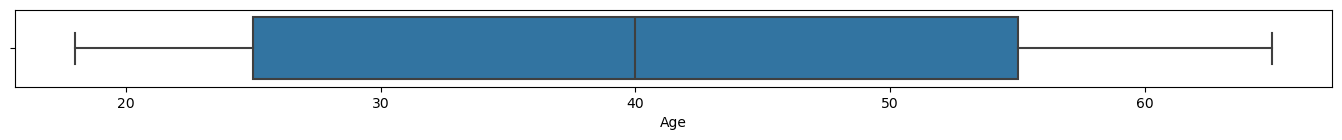

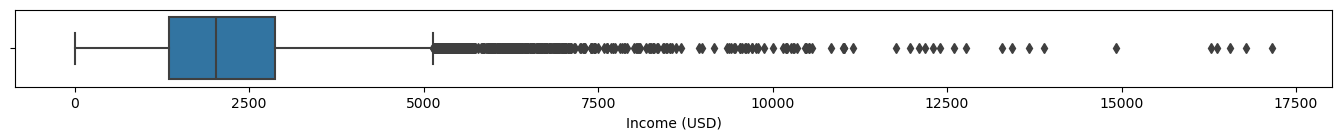

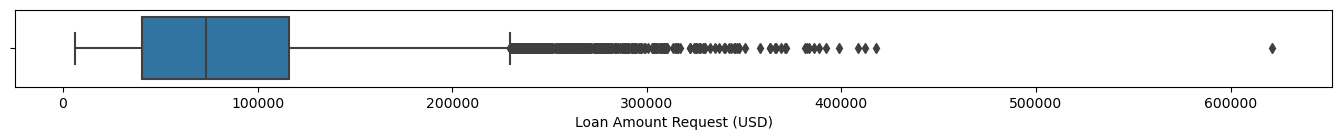

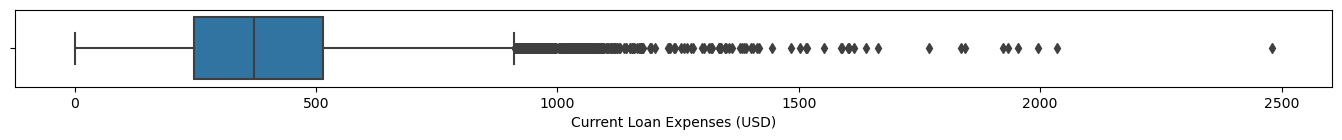

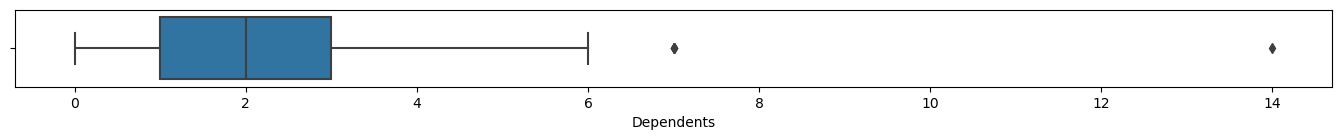

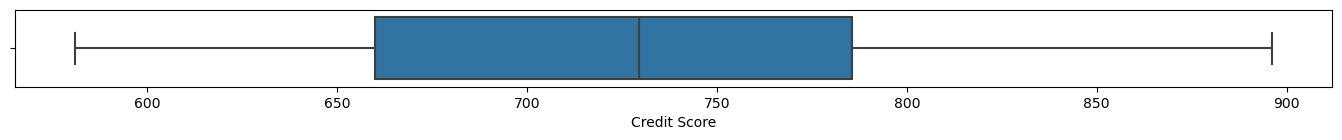

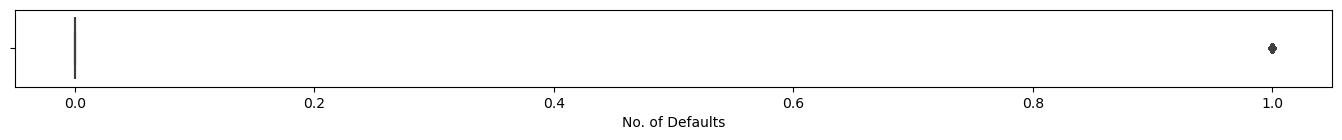

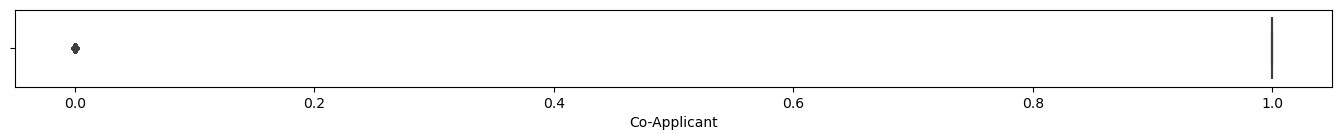

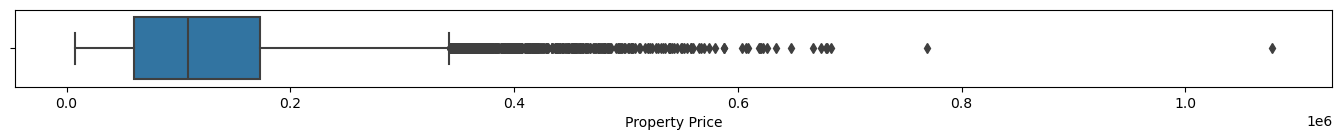

In [116]:
for col in num_columns:
    plt.figure(figsize = (17, 1))
    sns.boxplot(data = df_clf_sample, x = col)

In [117]:
col_out=['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'Property Price','Dependents']

In [118]:
for col in col_out:
    q1 = df_clf_sample[col].quantile(0.25)
    q3 = df_clf_sample[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + (whisker_width * iqr)
    df_clf_sample[df_clf_sample[col]<lower_whisker]
    df_clf_sample[df_clf_sample[col]>upper_whisker]
    df_clf_sample[col] = np.where(df_clf_sample[col] > upper_whisker, upper_whisker, np.where(df_clf_sample[col] < lower_whisker, lower_whisker, df_clf_sample[col]))

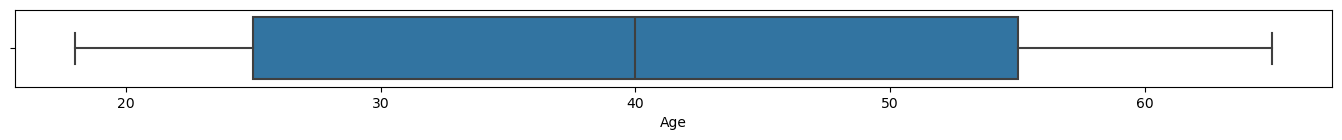

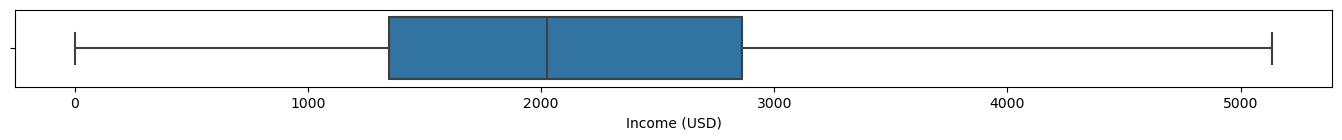

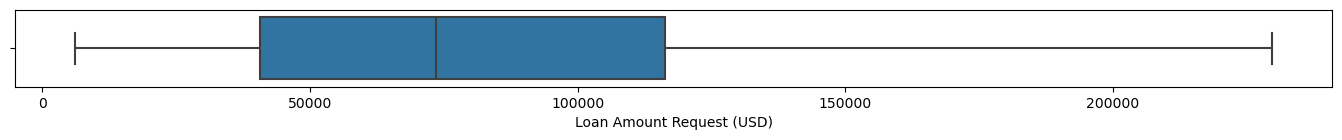

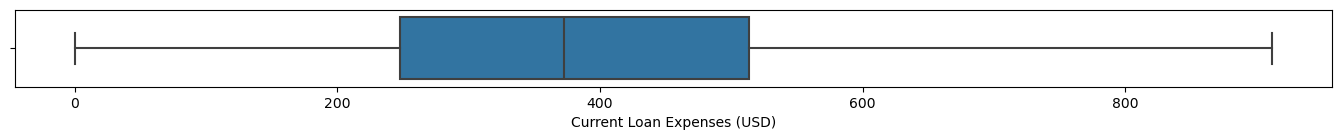

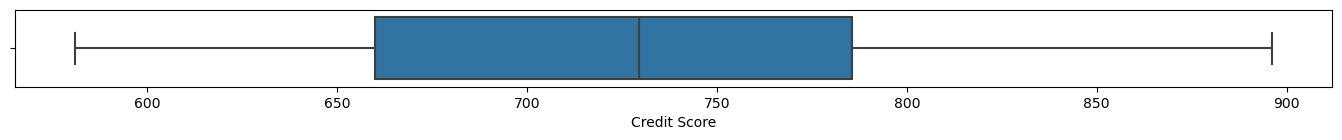

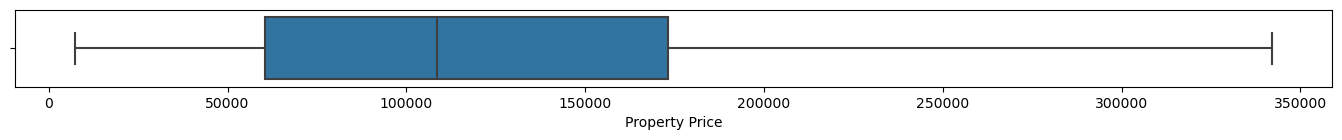

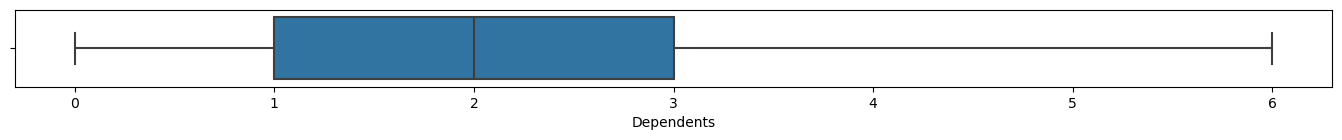

In [119]:
for col in col_out:
    plt.figure(figsize = (17, 1))
    sns.boxplot(data = df_clf_sample, x = col)

## Function Transform

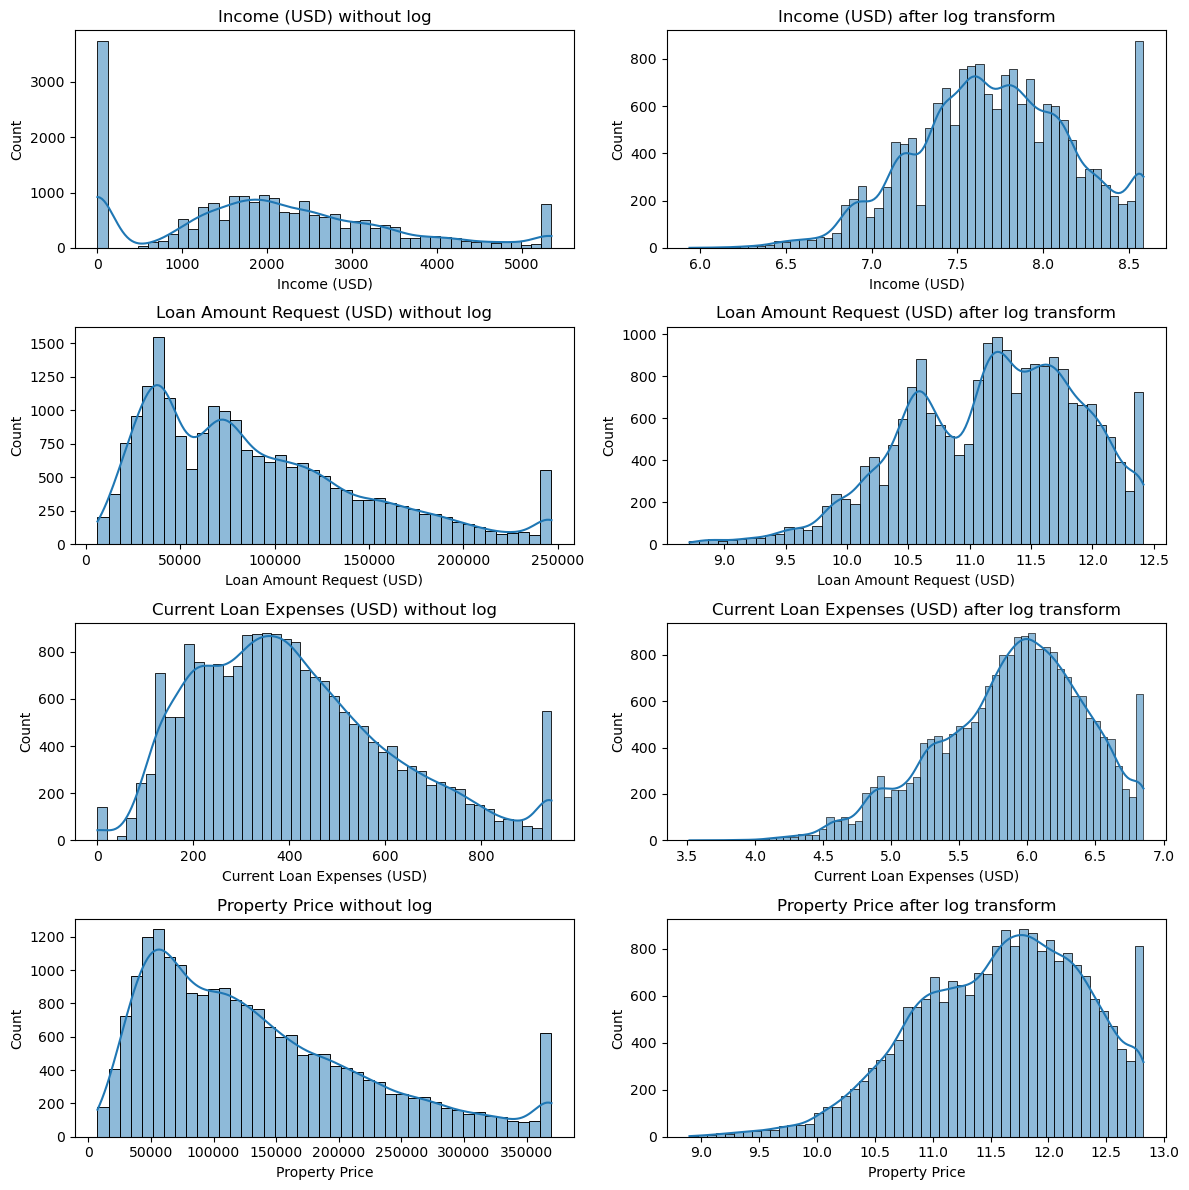

In [121]:
cols = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Price']

plt.figure(figsize=(12,12))

for index, col in enumerate(cols):
    plt.subplot(4,2, 2*index+1)
    sns.histplot(x=df_reg[col], kde=True)
    plt.title(f'{col} without log')
    
    plt.subplot(4,2, 2*index+2)
    sns.histplot(x=np.log(df_reg[col]), kde=True)
    plt.title(f'{col} after log transform')
    
plt.tight_layout()

## Feature Selection

Chi-squared test for all the features


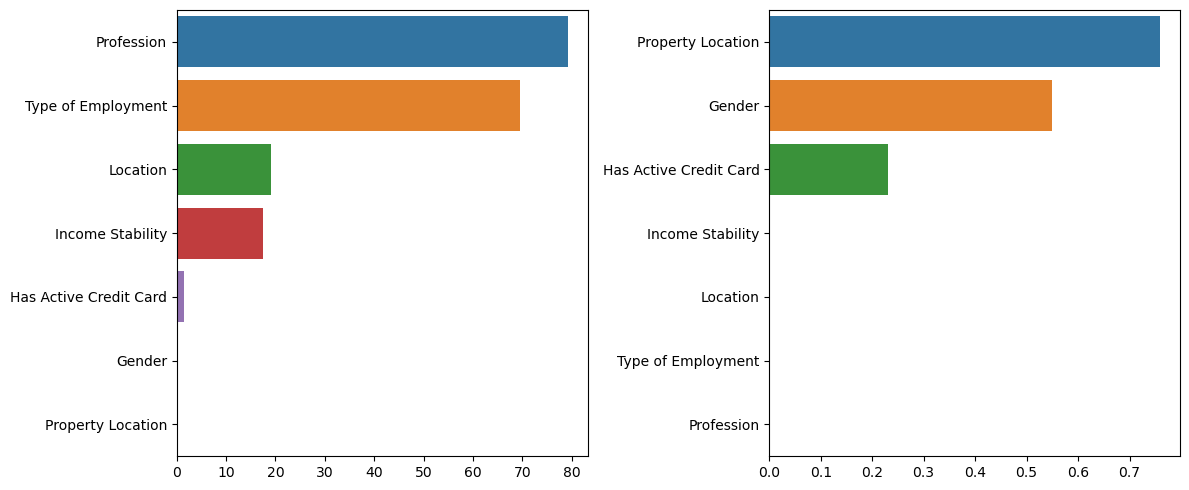

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


X = df.drop(columns=['Loan Sanction Amount (USD)', 'Loan sanctioned']).select_dtypes(include=['object', 'category'])
y = df['Loan sanctioned'].astype('int')

for col in X.columns:
    le= LabelEncoder()
    X[col] = le.fit_transform(X.loc[:, [col]])
    
    
# Applying Chi_square_test
chi_scores = chi2(X, y)
chi_stats = pd.Series(chi_scores[0], index=X.columns)
chi_stats.sort_values(ascending=False, inplace=True)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x = chi_stats, orient='h', y=chi_stats.index)

plt.subplot(1,2,2)
sns.barplot(x= p_values, y=p_values.index, orient='h')

print('Chi-squared test for all the features')
plt.tight_layout()

High chi_score means that feature is important. On the other hand, high p_values means that feature is not important for our model. As can be seen, we have many features with low mi score and high p_values. Such, features do not hold any role for affecting our target feature

# Model Creation

## Classification Model

In [127]:
df_clf_sample.sample(5)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan sanctioned
17046,M,21.0,1619.88,Low,Commercial associate,Not available,Semi-Urban,163184.50,608.22,3.0,831.24,1,Active,Rural,1,298132.41,False
18315,M,33.0,1639.04,Low,Working,Medicine staff,Rural,83546.22,459.49,3.0,665.28,0,Active,Rural,0,120177.63,False
12987,F,45.0,3041.67,Low,Working,Laborers,Semi-Urban,35840.30,274.59,2.0,639.03,0,Unpossessed,Urban,1,60247.30,False
28887,M,48.0,1942.57,Low,Working,Laborers,Rural,32620.27,208.91,3.0,708.29,0,Inactive,Rural,1,35915.97,False
18754,F,57.0,3178.97,Low,Working,Drivers,Semi-Urban,71181.84,737.28,3.0,841.65,0,Active,Rural,1,87220.76,True


In [128]:
from sklearn.model_selection import train_test_split
X = df_clf_sample.drop(columns=['Loan sanctioned'])
y = df_clf_sample['Loan sanctioned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12432, 16)
X_test shape: (3108, 16)
y_train shape: (12432,)
y_test shape: (3108,)


In [129]:
# Performing Ordinal Encoding 
X_train['Income Stability'] = X_train['Income Stability'].map({'Low': 0, 'High':1})
X_train['Location'] = X_train['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
X_train['Has Active Credit Card'] = X_train['Has Active Credit Card'].map({'Unpossessed': 0, 'Inactive': 1, 'Active':2})
X_train['Property Location'] = X_train['Property Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})

In [130]:
X_test['Income Stability'] = X_test['Income Stability'].map({'Low': 0, 'High':1})
X_test['Location'] = X_test['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
X_test['Has Active Credit Card'] = X_test['Has Active Credit Card'].map({'Unpossessed': 0, 'Inactive': 1, 'Active':2})
X_test['Property Location'] = X_test['Property Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})

In [131]:
X_train.sample(5)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
27369,F,51.0,2098.30,0,Working,Not available,1,66962.20,430.70,3.0,704.37,0,0,1,1,114423.06
28770,M,21.0,2162.10,0,Commercial associate,Not available,1,28422.86,152.13,2.0,648.89,0,0,0,1,52719.92
19545,M,50.0,2164.12,0,Working,Medicine staff,1,160341.54,614.11,2.0,788.54,0,2,0,1,192812.78
9361,F,33.0,0.00,0,Commercial associate,Core staff,1,115209.12,378.96,2.0,618.64,0,0,2,0,131795.58
10193,F,42.0,1960.98,0,Working,Laborers,1,80761.58,365.63,5.0,704.18,0,2,0,1,136222.34


In [132]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

trnf_1 = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), [0,4,5])
], remainder='passthrough')

In [133]:
X_train_tra = trnf_1.fit_transform(X_train)
X_train_tra

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.4311356e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1198206e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 4.8748360e+04],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.7189690e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0896640e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.7173976e+05]])

In [134]:
X_test_tra = trnf_1.transform(X_test)
X_test_tra

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.8563990e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        0.0000000e+00, 1.2714883e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.2590494e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 2.3549243e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 8.1273340e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 6.5689520e+04]])

In [135]:
# Encoding target feature
le = LabelEncoder()
y_train_tra = le.fit_transform(y_train)

In [136]:
y_test_tra = le.transform(y_test)

In [137]:
y_test_tra

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train_tra,y_train_tra)

LogisticRegression()

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
target_pred = log_reg.predict(X_test_tra)

# Checking performance
accuracy_score(y_test_tra, target_pred)

0.5653153153153153

In [140]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(max_depth=5)
dec_clf.fit(X_train_tra,y_train_tra)

DecisionTreeClassifier(max_depth=5)

In [141]:
target_pred_dec = dec_clf.predict(X_test_tra)

# Checking performance
accuracy_score(y_test_tra, target_pred_dec)

0.8388030888030888

In [142]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
Rf_clf.fit(X_train_tra,y_train_tra)

RandomForestClassifier(n_estimators=300, random_state=42)

In [143]:
target_pred_Rf = Rf_clf.predict(X_test_tra)

# Checking performance
accuracy_score(y_test_tra, target_pred_Rf)

0.8346203346203346

## Regression Model

In [144]:
df_reg.sample(7)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan sanctioned
7050,F,48.0,1845.6100,Low,Working,Laborers,Semi-Urban,78120.85,334.09000,1.0,792.15,0,Inactive,Urban,1,119933.31,62496.68,True
16582,F,33.0,0.0000,Low,Commercial associate,Managers,Semi-Urban,29062.64,129.14000,2.0,882.23,0,Inactive,Rural,1,50876.58,20343.85,True
16882,F,65.0,0.0000,High,Pensioner,Retired,Semi-Urban,43572.61,264.31000,2.0,740.04,1,Active,Urban,1,66498.69,34858.09,True
21806,F,24.0,4011.5800,Low,Commercial associate,Managers,Semi-Urban,218096.11,744.44000,2.0,855.17,0,Inactive,Urban,1,355877.72,152667.28,True
25605,F,30.0,5351.7775,Low,Working,Accountants,Urban,204406.59,946.50875,2.0,856.56,0,Active,Semi-Urban,1,351332.16,143084.61,True
28049,M,28.0,1673.4500,Low,Working,Laborers,Semi-Urban,111454.40,378.48000,2.0,675.16,0,Unpossessed,Rural,1,162514.25,78018.08,True
16947,F,18.0,2782.1000,Low,State servant,Laborers,Urban,207394.31,869.37000,2.0,814.97,0,Unpossessed,Urban,1,289968.90,145176.02,True


In [178]:
X = df_reg.drop(columns=['Loan sanctioned','Loan Sanction Amount (USD)'])
y = df_reg['Loan Sanction Amount (USD)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("X_train shape:", X_train_reg.shape)
print("X_test shape:", X_test_reg.shape)
print("y_train shape:", y_train_reg.shape)
print("y_test shape:", y_test_reg.shape)

X_train shape: (16705, 16)
X_test shape: (4177, 16)
y_train shape: (16705,)
y_test shape: (4177,)


In [180]:
df_reg.shape

(20882, 18)

In [182]:
# Performing Ordinal Encoding 
X_train_reg['Income Stability'] = X_train_reg['Income Stability'].map({'Low': 0, 'High':1})
X_train_reg['Location'] = X_train_reg['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
X_train_reg['Has Active Credit Card'] = X_train_reg['Has Active Credit Card'].map({'Unpossessed': 0, 'Inactive': 1, 'Active':2})
X_train_reg['Property Location'] = X_train_reg['Property Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})

In [184]:
X_test_reg['Income Stability'] = X_test_reg['Income Stability'].map({'Low': 0, 'High':1})
X_test_reg['Location'] = X_test_reg['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
X_test_reg['Has Active Credit Card'] = X_test_reg['Has Active Credit Card'].map({'Unpossessed': 0, 'Inactive': 1, 'Active':2})
X_test_reg['Property Location'] = X_test_reg['Property Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})

In [186]:
trnf = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), [0,4,5])
], remainder='passthrough')

In [188]:
X_train_reg_tra = trnf.fit_transform(X_train_reg)
X_train_reg_tra

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 4.3631190e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 7.9705430e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0445433e+05],
       ...,
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.2723068e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 2.9873348e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 6.6954290e+04]])

In [190]:
X_test_tra = trnf.transform(X_test_reg)
X_test_tra

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 6.0212130e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.0382780e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.7272264e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 2.2672768e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        1.0000000e+00, 1.2642961e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.0916395e+05]])

In [192]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_reg_tra, y_train_reg)

LinearRegression()

In [196]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Prediction on train set
reg_pred = lr.predict(X_test_tra)
# Checking for accuracy of the model
print(f"R2_score of the model is {np.round(r2_score(y_test_reg, reg_pred),2)}")
print(f"Mean Absolute Eroor of the model is {np.round(mean_absolute_error(y_test_reg, reg_pred), 2)}")

R2_score of the model is 0.99
Mean Absolute Eroor of the model is 3350.72


In [216]:
from sklearn.tree import DecisionTreeRegressor
# Applying decision tree regressor
tr_reg = DecisionTreeRegressor(max_depth=10)

tr_reg.fit(X_train_reg_tra, y_train_reg)


DecisionTreeRegressor(max_depth=10)

In [218]:

reg_pred_dec = tr_reg.predict(X_test_tra)
# Checking for accuracy of the model
print(f"R2_score of the model is {np.round(r2_score(y_test_reg, reg_pred_dec),2)}")
print(f"Mean Absolute Eroor of the model is {np.round(mean_absolute_error(y_test_reg, reg_pred_dec), 2)}")

R2_score of the model is 0.99
Mean Absolute Eroor of the model is 3085.72


In [240]:
from sklearn.ensemble import RandomForestRegressor
# Applying decision tree regressor
Rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

Rf_reg.fit(X_train_reg_tra, y_train_reg)

RandomForestRegressor(n_estimators=200, random_state=42)

In [242]:
reg_pred_Rf = Rf_reg.predict(X_test_tra)
# Checking for accuracy of the model
print(f"R2_score of the model is {np.round(r2_score(y_test_reg, reg_pred_Rf),2)}")
print(f"Mean Absolute Eroor of the model is {np.round(mean_absolute_error(y_test_reg, reg_pred_Rf), 2)}")

R2_score of the model is 0.99
Mean Absolute Eroor of the model is 2897.69


In [ ]:
df_reg.to_csv("data_reg.csv", index=False)

In [ ]:
df_reg.to_csv("data_reg.csv", index=False)